# Проект для интернет-магазина "В один клик". Персонализированное предложение.

Нужно разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность


***Задача***

1) Нужно промаркировать уровень финансовой активности постоянных покупателей. 
В компании принято выделять два уровня активности: </font><br>
- «снизилась», если клиент стал покупать меньше товаров
- «прежний уровень».

2) Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

3) Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.


## Описание данных

1) `market_file.csv`
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.</font><br>
- `id` — номер покупателя в корпоративной базе данных.</font><br>
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

2) `market_money.csv`
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.</font><br>
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.

3) `market_time.csv`
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.</font><br>
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

4) `money.csv`
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.</font><br>
- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.



## План работы
1. Загрузка и знакомство с данными. 
2. Предобработка данных.
- Проверка пропусков
- Проверка наличия дубликатов.
3. Исследовательский анализ данных.
4. Объединенние данных.
5. Корреляционный анализ данных.
6. Подготовка и работа с моделью. 
7. Поиск лучшей модели.
8. Анализ важности признаков.
9. Сегментация и анализ покупателей. 
10. Вывод.


## Библиотеки

In [1]:
!pip install -q shap 
!pip install scikit-learn==1.1.3 -q

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 8)
import seaborn as sns
import numpy as np
import shap
import sklearn
from scipy import stats
from scipy.stats import norm, shapiro

#для работы с мо
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.datasets import make_classification

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer


#для работы с пайплайнами
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# загружаем дополнительные классы для преобразования данных
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler, 
    MinMaxScaler,
    LabelEncoder)

# загружаем нужные метрики
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif

# настройки модели
RANDOM_STATE = 42
TEST_SIZE = 0.25

### Загрузка и первые преобразования
#### 1 таблица с данными о поведении клиентов на сайте

In [2]:
market_file_data = pd.read_csv('/datasets/market_file.csv')
market_file_data.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [3]:
market_file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Видим по первой информации по файлу:
- пропусков нет
- форматы верные

Для удобства оставим русские названия, но приведем все к нижнему регистру и уберем "_ " из названия. 

In [4]:
market_file_data.columns = market_file_data.columns.str.replace('_', ' ')
market_file_data.columns = market_file_data.columns.str.lower()
market_file_data = market_file_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
market_file_data.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


#### 2 таблица с данными о выручке

In [5]:
market_money_data = pd.read_csv('/datasets/market_money.csv')
market_money_data.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
market_money_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Видим по первой информации по файлу:
- пропусков нет
- форматы верные

Для удобства оставим русские названия, переведем все буквы на нижний регистр и заменим разделитель на пробел.

In [7]:
market_money_data.columns = market_money_data.columns.str.lower()
market_money_data['период'] = market_money_data['период'].str.replace("_", " ")
market_money_data.head(10)

,id,период,выручка
0,215348,препредыдущий месяц,0.0
1,215348,текущий месяц,3293.1
2,215348,предыдущий месяц,0.0
3,215349,препредыдущий месяц,4472.0
4,215349,текущий месяц,4971.6
5,215349,предыдущий месяц,5216.0
6,215350,препредыдущий месяц,4826.0
7,215350,текущий месяц,5058.4
8,215350,предыдущий месяц,5457.5
9,215351,текущий месяц,6610.4


#### 3 таблица с данными о времени на сайте

In [8]:
market_time_data = pd.read_csv('/datasets/market_time.csv')
market_time_data.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
market_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Видим по первой информации по файлу:
- пропусков нет
- форматы верные

Для удобства оставим русские названия и переведем все буквы на нижний регистр.

In [10]:
market_time_data.columns = market_time_data.columns.str.lower()
market_time_data['период'] = market_time_data['период'].replace({'предыдцщий_месяц': 'предыдущий месяц'}, regex=True)
market_time_data['период'] = market_time_data['период'].str.replace("_", " ")
market_time_data.head()

,id,период,минут
0,215348,текущий месяц,14
1,215348,предыдущий месяц,13
2,215349,текущий месяц,10
3,215349,предыдущий месяц,12
4,215350,текущий месяц,13


#### 4 таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца

In [11]:
money_data = pd.read_csv('/datasets/money.csv',sep=';',decimal=',')
money_data.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [12]:
money_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Прибыль не в верном формате, преобразуем в числовой. 

In [13]:
money_data['Прибыль'] = money_data['Прибыль'].astype(float)
money_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Теперь общая информация по данным:
- пропусков нет
- форматы верные

Для удобства оставим русские названия и переведем все буквы на нижний регистр.

In [14]:
money_data.columns = money_data.columns.str.lower()
money_data.head(10)

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


###  Предобработка данных

Перед предобработкой данных проверим размер датасетов.

In [15]:
print(f"Размер файла: \nmarket_file_data - {len(market_file_data)}, \
                \nmarket_money_data - {len(market_money_data)}, \
                \nmarket_time_data - {len(market_time_data)}, \
                \nmoney_data - {len(money_data)}")

Размер файла: 
market_file_data - 1300,                 
market_money_data - 3900,                 
market_time_data - 2600,                 
money_data - 1300


#### Проверка пропусков и заполнение их, если это возможно.

In [16]:
print(f"Пропуски:\n"
      f"Количество пропусков в market_file_data: {market_file_data.isnull().sum()}\n"
      f"Количество пропусков в market_money_data: {market_money_data.isnull().sum()}\n"
      f"Количество пропусков в market_time_data: {market_time_data.isnull().sum()}\n"
      f"Количество пропусков в money_data: {money_data.isnull().sum()}")

Пропуски:
Количество пропусков в market_file_data: id                                     0
покупательская активность              0
тип сервиса                            0
разрешить сообщать                     0
маркет актив 6 мес                     0
маркет актив тек мес                   0
длительность                           0
акционные покупки                      0
популярная категория                   0
средний просмотр категорий за визит    0
неоплаченные продукты штук квартал     0
ошибка сервиса                         0
страниц за визит                       0
dtype: int64
Количество пропусков в market_money_data: id         0
период     0
выручка    0
dtype: int64
Количество пропусков в market_time_data: id        0
период    0
минут     0
dtype: int64
Количество пропусков в money_data: id         0
прибыль    0
dtype: int64


При первой визуальной проверки данных пропусков не было видно, но на всякий случай перепроверила.

#### Проверка дублей.

***Проверим сначала явные дубликаты.***

In [17]:
print(f"Дубли:\n"
      f"Количество явных дублей в market_file_data: {market_file_data.duplicated().sum()}\n"
      f"Количество явных дублей в market_money_data: {market_money_data.duplicated().sum()}\n"
      f"Количество явных дублей в market_time_data: {market_time_data.duplicated().sum()}\n"
      f"Количество явных дублей в money_data: {money_data.duplicated().sum()}")

Дубли:
Количество явных дублей в market_file_data: 0
Количество явных дублей в market_money_data: 0
Количество явных дублей в market_time_data: 0
Количество явных дублей в money_data: 0


Явных дублей нет.

***Рассмотрим более подробно категориальные данные.***

In [18]:
market_file_data.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2


In [19]:
mfd_cat_col = ['покупательская активность','тип сервиса','разрешить сообщать','популярная категория']

In [20]:
result = market_file_data[mfd_cat_col].melt(value_vars=mfd_cat_col)
result = result.groupby(['variable', 'value']).size().reset_index(name='count')
result.columns = ['Наименование столбца', 'Уникальное значение', 'Кол-во повторов']
result

,Наименование столбца,Уникальное значение,Кол-во повторов
0,покупательская активность,прежний уровень,802
1,покупательская активность,снизилась,498
2,популярная категория,домашний текстиль,251
3,популярная категория,косметика и аксесуары,223
4,популярная категория,кухонная посуда,138
5,популярная категория,мелкая бытовая техника и электроника,174
6,популярная категория,техника для красоты и здоровья,184
7,популярная категория,товары для детей,330
8,разрешить сообщать,да,962
9,разрешить сообщать,нет,338


Видим, что по `покупательской активности`,`популярной категории` и `разрешить сообщать`  нет дублей. </font><br>
А вот в `типе сервиса` видно были опечатки и стандарт записали как стандратт. Исправим это.

In [21]:
market_file_data['тип сервиса'] = market_file_data['тип сервиса'].replace({'стандартт': 'стандарт'}, regex=True)
market_file_data['тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [22]:
market_money_data.head()

,id,период,выручка
0,215348,препредыдущий месяц,0.0
1,215348,текущий месяц,3293.1
2,215348,предыдущий месяц,0.0
3,215349,препредыдущий месяц,4472.0
4,215349,текущий месяц,4971.6


In [23]:
market_money_data['период'].unique()

array(['препредыдущий месяц', 'текущий месяц', 'предыдущий месяц'],
      dtype=object)

Во второй таблице нет дублей по категории.

In [24]:
market_time_data.head()

,id,период,минут
0,215348,текущий месяц,14
1,215348,предыдущий месяц,13
2,215349,текущий месяц,10
3,215349,предыдущий месяц,12
4,215350,текущий месяц,13


In [25]:
market_money_data['период'].unique()

array(['препредыдущий месяц', 'текущий месяц', 'предыдущий месяц'],
      dtype=object)

В третьей таблице нет дублей по категории.</font><br>
В четвертой таблице не было категориальных данных.

***Выводы:***</font><br>
Явных дублей не было. Была опечатка в данных в дата сете `market_file_data` в типе сервиса, скорее всего данные заносили вручную из-за этого появились невяные дубликаты в категориальных наименованиях. 

## Исследовательский анализ данных
### Количественные значения

Проведем исследовательский анализ данных. Нужно отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

#### Первая таблица.

In [26]:
market_file_data.describe()

,id,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


1) Сразу видны отклонения между средним значением и медианой у акционных покупок, скорее всего есть выбросы. </font><br>
2) Данные заполнены у всех параметров.</font><br>
3) У параметров (маркет актив тек мес, средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса, страниц за визит) только целые числа и разброс между минимальным и максимальным значением небольшой.

Посмотрим в разрезе графиков на данные.

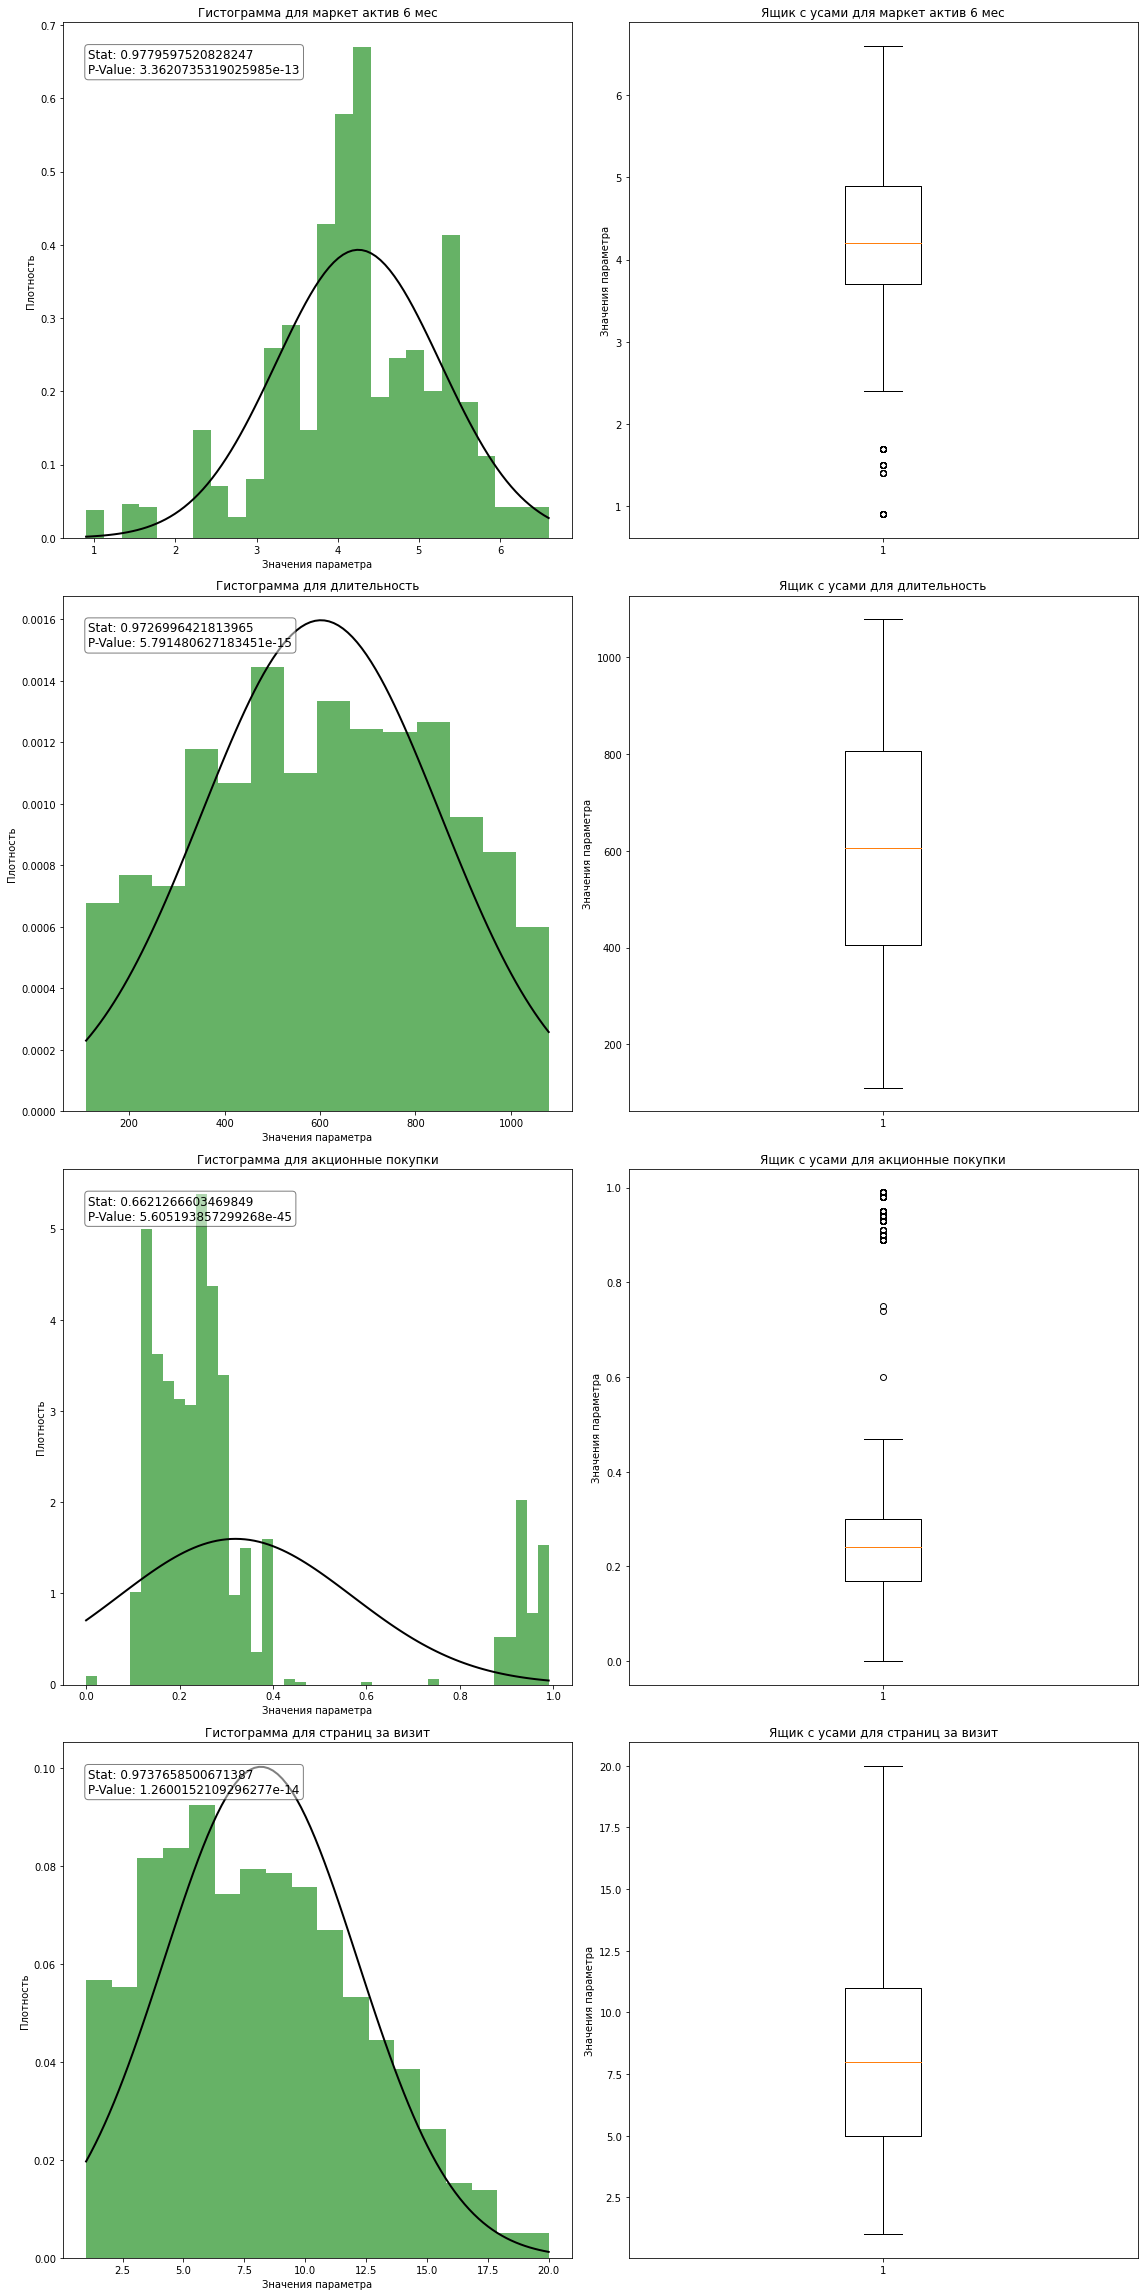

In [27]:
# Функция для создания гистограммы и ящика с усами с проверкой нормальности
def plot_hist_and_box(a, b=None):
    # Выбор числовых столбцов
    numerical_data = a.select_dtypes(include='number')

    # Исключение указанных столбцов
    if b is not None:
        numerical_data = numerical_data.drop(columns=b, errors='ignore')
        
    # Определяем количество графиков и фигуру построения
    num_columns = numerical_data.shape[1]
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(16, num_columns * 8))

    for i, column in enumerate(numerical_data.columns):
        # Построение гистограммы
        #параметр density=True,нормализует гистограмму, чтобы она показывала плотность распределения.
        axes[i, 0].hist(numerical_data[column], bins='auto', alpha=0.6, color='green', density=True)
        axes[i, 0].set_xlabel('Значения параметра')
        axes[i, 0].set_ylabel('Плотность')
        axes[i, 0].set_title(f'Гистограмма для {column}')

        # Нормальная кривая
        mu, std = norm.fit(numerical_data[column])  # Подсчет среднего и стандартного отклонения
        x = np.linspace(numerical_data[column].min(), numerical_data[column].max(), 100)
        p = norm.pdf(x, mu, std)  # Плотность нормального распределения
        axes[i, 0].plot(x, p, 'k', linewidth=2)  # Наложение нормальной кривой

        # Проверка на нормальность с помощью теста Шапиро-Уилка
        stat, p_value = shapiro(numerical_data[column])
        axes[i, 0].text(0.05, 0.95, f'Stat: {stat}\nP-Value: {p_value}', 
                        transform=axes[i, 0].transAxes, fontsize=12,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

        # Построение ящика с усами
        axes[i, 1].boxplot(numerical_data[column])
        axes[i, 1].set_ylabel('Значения параметра')
        axes[i, 1].set_title(f'Ящик с усами для {column}')

    plt.tight_layout()
    plt.show()

# Пример вызова функции с исключением столбцов
a = market_file_data
b = ['id', 'маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса'] 
plot_hist_and_box(a, b)

Видны выбросы по акционным покупкам, более детально рассмотрим график ниже, так же небольшие выбросы низких значений у маркет активности за 6 месяцев. </font><br>
Данные `маркет.актив 6 мес`,`длительность`  и `страниц за визит` имеют высокое значение statistic, но при этом значение p_value ниже 0,05, что говорит о том, что данные распределены не нормально (есть сильные выборосы или другие аномалии, которые влияют на тест).</font><br>

По маркет.активности за 6 месяцев видим, что больше всего это 4 разных маркет.коммуникаций с покупателем. </font><br>
По длительности мы видим, что весомая доля клиентов от 500 до 800 дней, то есть большая часть уже старых и активных покупателей компании.</font><br>
Чаще всего клиенты рассматривает до 10 страниц.</font><br>


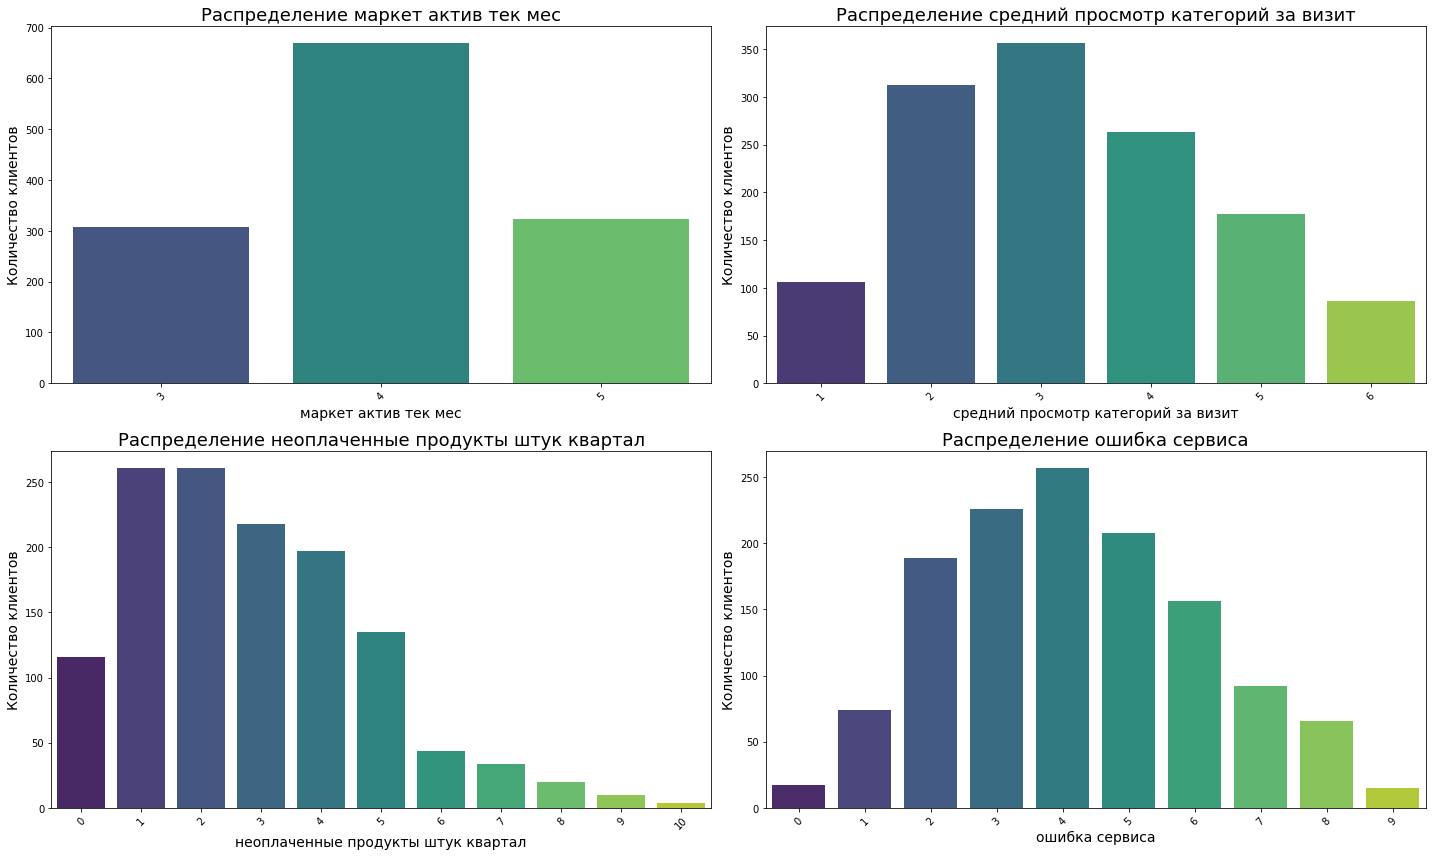

In [28]:
def plot_discrete_features(a, b):
    num_columns = len(b)
    num_rows = (num_columns + 1) // 2  # Количество строк, чтобы разместить по 2 графика в строке
    
    plt.figure(figsize=(20, 6 * num_rows))  # Увеличиваем размер фигуры для более удобного отображения

    for i, feature in enumerate(b):
        ax = plt.subplot(num_rows, 2, i + 1)  # Создаем подграфик
        sns.countplot(x=feature, data=a, palette='viridis', ax=ax)  
        plt.title(f'Распределение {feature}', fontsize=18)  
        plt.xlabel(feature, fontsize=14)  
        plt.ylabel('Количество клиентов', fontsize=14)  
        plt.xticks(rotation=45)  

    plt.tight_layout()  # Автоматически подгоняет подграфики
    plt.show()

# Пример вызова функции
a = market_file_data 
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса']
plot_discrete_features(a, b)

По маркет.активности за тек месяц видим около 4 разных вариатов. </font><br>
Чаще всего клиенты рассматривает от 2 до 4 категорий за раз и у многих клиентов по 1-2 товару застревает в корзине. </font><br>
В среднем 3-5 ошибок возникаю у клиентов.



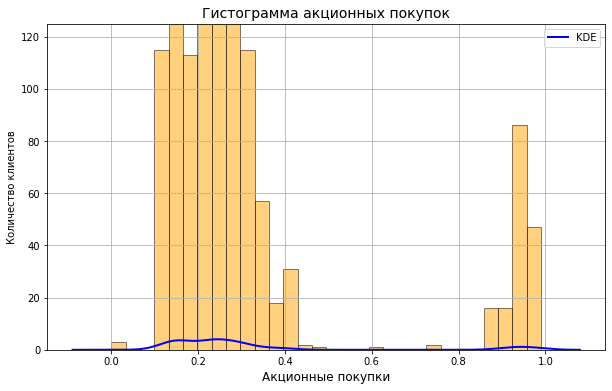

In [29]:
plt.figure(figsize=(10, 6))
market_file_data['акционные покупки'].hist(bins=30, color='orange', edgecolor='black', alpha=0.5)
plt.title('Гистограмма акционных покупок', fontsize=14)
plt.xlabel('Акционные покупки', fontsize=12)
plt.ylabel('Количество клиентов')
# Наложение кривой плотности (KDE)
sns.kdeplot(market_file_data['акционные покупки'], color='blue', linewidth=2, label='KDE', bw_adjust=0.5)
plt.ylim(0, 125)
plt.legend()
plt.show()

По `акционным покупкам` мы видим несколько пиков около 0,2 и ближе к 1, отображение мульти-модальности.Возможно это связано с разными категориями, в какой-то чаще всего происходят продажи только по акции.

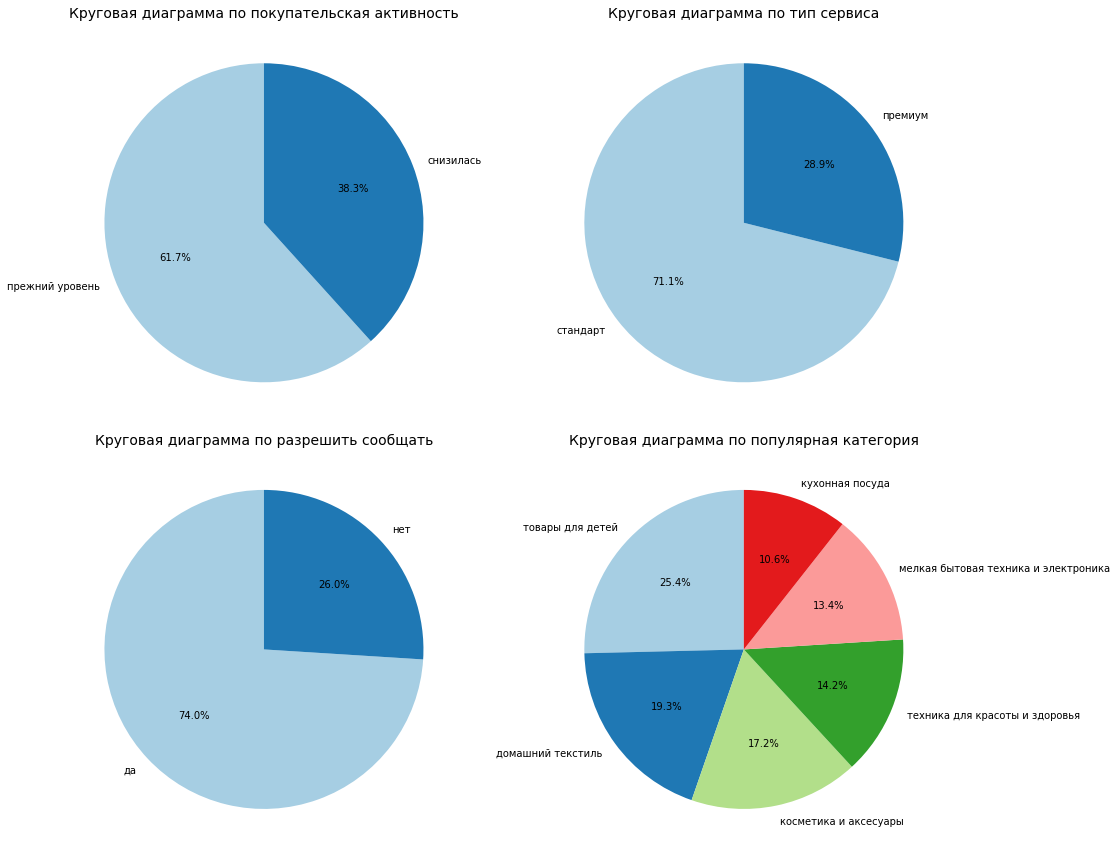

In [30]:
categorical_cols = market_file_data.select_dtypes(include=['object', 'category']).columns

# Кол-во подграфиков
num_cols = 2  # Количество столбцов
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols  # Количество строк

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))  # Увеличиваем размер

# Плоский массив осей для удобства
axes = axes.flatten()

# Построение круговой диаграммы для каждого категориального столбца
for ax, col in zip(axes, categorical_cols):
    market_file_data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, ax=ax)
    ax.set_title(f'Круговая диаграмма по {col}', fontsize=14)
    ax.set_ylabel('')  # Убираем метку Y

# Если есть лишние подграфики, скрываем их
for ax in axes[len(categorical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

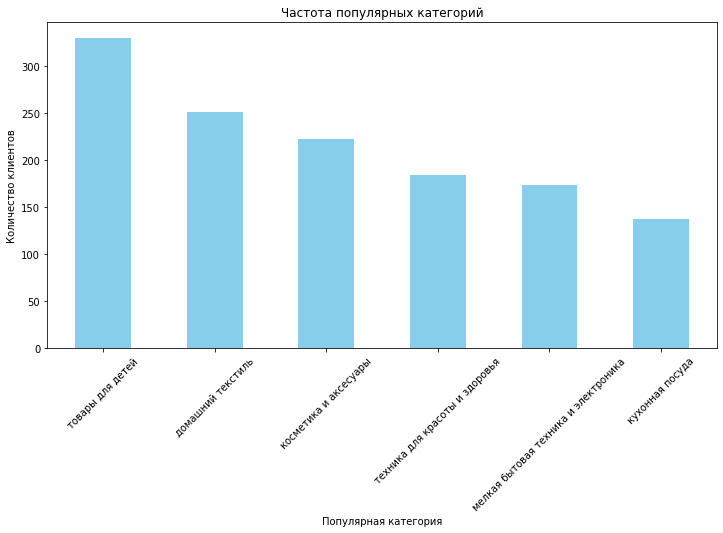

In [31]:
# Сортируем значения от большего к меньшему
sorted_counts = market_file_data['популярная категория'].value_counts().sort_values(ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sorted_counts.plot(kind='bar', color='skyblue')
plt.title('Частота популярных категорий')
plt.xlabel('Популярная категория')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X для удобства
plt.show()

- почти 62% клиентов сохранило свой уровень активности, а у 38% она снизилась.</font><br>
- почти 71% клиентов относятся к типу стандарт, а у 29% к премиум.</font><br>
- почти 74% клиентов лояльно относятся к рассылкам, а у 26% стоит запрет.</font><br>
- видим, что самая популярная категория - это товары для детей, а самая низка кухонная посуда.

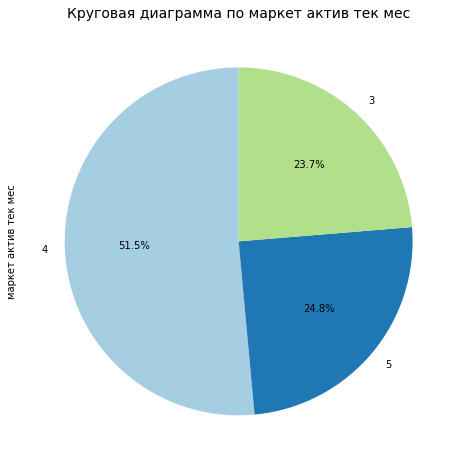

In [32]:
plt.figure(figsize=(8, 8))
market_file_data['маркет актив тек мес'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Круговая диаграмма по маркет актив тек мес', fontsize=14)
plt.show()

По маркетинговой активности видим, что у 52% клиентов было около 4 разных маркетинговых акций, и близка доля у 3 и 5.

#### Вторая таблица

Рассмотрим вторую таблицу `market_money_data`.

In [33]:
market_money_data.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


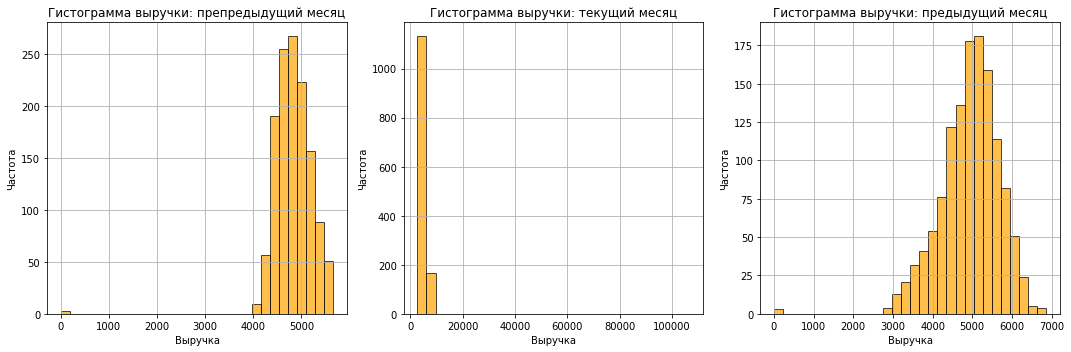

In [34]:
periods = market_money_data['период'].unique()

plt.figure(figsize=(15, 5))

for i, period in enumerate(periods):
    plt.subplot(1, len(periods), i + 1)
    market_money_data[
        market_money_data['период'] == period]['выручка'].hist(bins=30,color='orange', edgecolor='black', alpha=0.7)
    plt.title(f'Гистограмма выручки: {period}', fontsize=12)
    plt.xlabel('Выручка', fontsize=10)
    plt.ylabel('Частота', fontsize=10)

plt.tight_layout()
plt.show()


Видим 0 выручку. Посмотрим поподробнее на эти данные. 

In [35]:
market_money_zero = market_money_data[market_money_data['выручка'] == 0]
market_money_zero.count()

id         6
период     6
выручка    6
dtype: int64

Видим, что всего у 6 из 3900 записей 0 выручка. Это те клиенты, которые не совершали покупок в течение 3х месяцев. Удалим этих клиентов из выборки. 

In [36]:
market_money_zero['id'].unique()

array([215348, 215357, 215359])

Видим, что всего у 3 клиентов не было активности. Удалим их.

In [37]:
ids_to_remove = [215348, 215357, 215359,215380]
market_money_data = market_money_data.query('id not in @ids_to_remove')
market_money_data['id'].nunique()

1296

Так же серьезно выбивается график за текущий месяц. Посмотрим сколько значений больше 20000.

In [38]:
market_money_over = market_money_data[market_money_data['выручка'] > 20000]
market_money_over.count()

id         0
период     0
выручка    0
dtype: int64

In [39]:
market_money_over = market_money_data[market_money_data['период'] == 'текущий_месяц']
market_money_over.count()

id         0
период     0
выручка    0
dtype: int64

Видно, что это всего один клиент из 1300. Удалим его.

In [40]:
market_money_data = market_money_data[market_money_data['выручка'] < 20000]

Построим новые диаграммы.

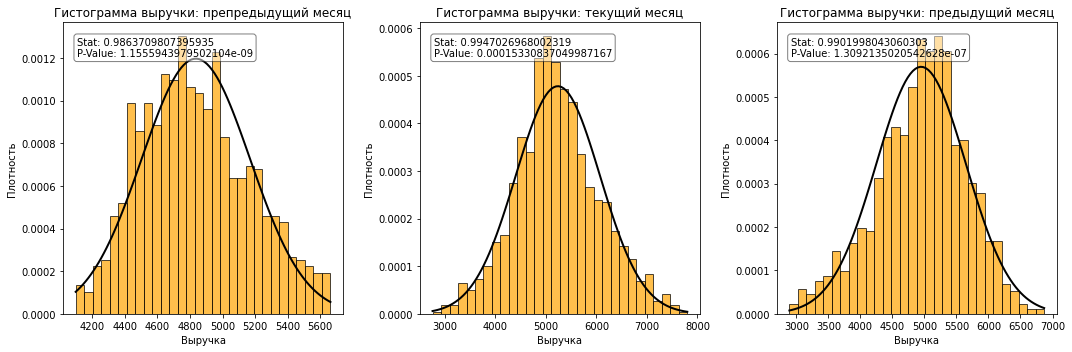

In [41]:
periods = market_money_data['период'].unique()

plt.figure(figsize=(15, 5))

for i, period in enumerate(periods):
    plt.subplot(1, len(periods), i + 1)
    
    # Фильтруем данные по текущему периоду
    data_for_period = market_money_data[market_money_data['период'] == period]['выручка']
    
    # Построение гистограммы с плотностью
    plt.hist(data_for_period, bins=30, color='orange', edgecolor='black', alpha=0.7, density=True)
    plt.title(f'Гистограмма выручки: {period}', fontsize=12)
    plt.xlabel('Выручка', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)

    # Нормальная кривая
    mu, std = norm.fit(data_for_period)  # Подсчет среднего и стандартного отклонения
    x = np.linspace(data_for_period.min(), data_for_period.max(), 100)
    p = norm.pdf(x, mu, std)  # Плотность нормального распределения
    plt.plot(x, p, 'k', linewidth=2)  # Наложение нормальной кривой на текущую ось
    
    # Проверка на нормальность с помощью теста Шапиро-Уилка
    if len(data_for_period) >= 3:  # Проверяем, достаточно ли данных для теста
        stat, p_value = shapiro(data_for_period)
        plt.text(0.05, 0.95, f'Stat: {stat}\nP-Value: {p_value}', 
                 transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

Выбросы убрали. Данные имеют высокое значение statistic, но при этом значение p_value ниже 0,05, что говорит о том, что данные распределены не нормально (есть сильные выборосы или другие аномалии, которые влияют на тест).

#### Третья таблица
Рассмотрим третью таблицу `market_time_data`.

In [42]:
market_time_data.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


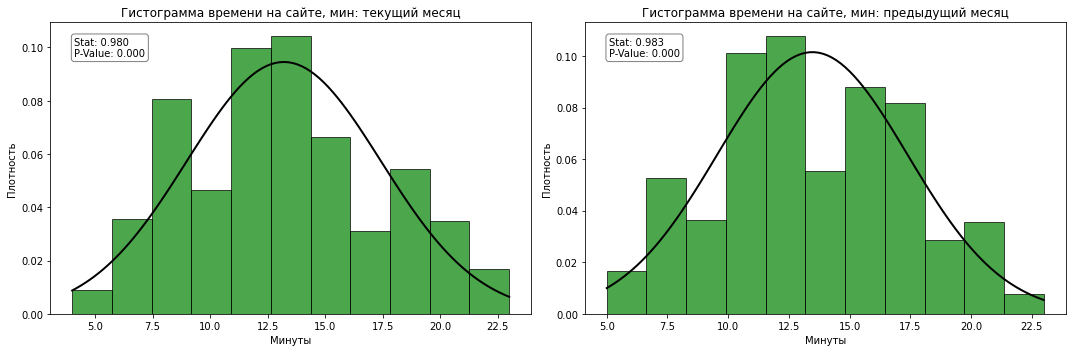

In [43]:
periods = market_time_data['период'].unique()

plt.figure(figsize=(15, 5))

for i, period in enumerate(periods):
    plt.subplot(1, len(periods), i + 1)
    
    # Фильтруем данные по текущему периоду
    data_for_period = market_time_data[market_time_data['период'] == period]['минут']
    
    # Количество наблюдений
    n = len(data_for_period)
    
    # Рассчитываем количество бинов по правилу Стёрджеса
    bins = int(np.log2(n)) + 1 if n > 1 else 1

    # Построение гистограммы
    plt.hist(data_for_period, bins=bins, color='green', edgecolor='black', alpha=0.7, density=True)
    plt.title(f'Гистограмма времени на сайте, мин: {period}', fontsize=12)
    plt.xlabel('Минуты', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)

    # Нормальная кривая
    mu, std = norm.fit(data_for_period)  # Подсчет среднего и стандартного отклонения
    x = np.linspace(data_for_period.min(), data_for_period.max(), 100)
    p = norm.pdf(x, mu, std)  # Плотность нормального распределения
    plt.plot(x, p, 'k', linewidth=2)  # Наложение нормальной кривой
    
    # Проверка на нормальность с помощью теста Шапиро-Уилка
    stat, p_value = shapiro(data_for_period)
    plt.text(0.05, 0.95, f'Stat: {stat:.3f}\nP-Value: {p_value:.3f}', 
            transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

В среднем клиент проводит около 13 минут на сайте за весь период.</font><br>
Данные распределены не нормально.

#### Четвертая таблица
Рассмотрим 4 таблицу `money_data`.

In [44]:
money_data.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


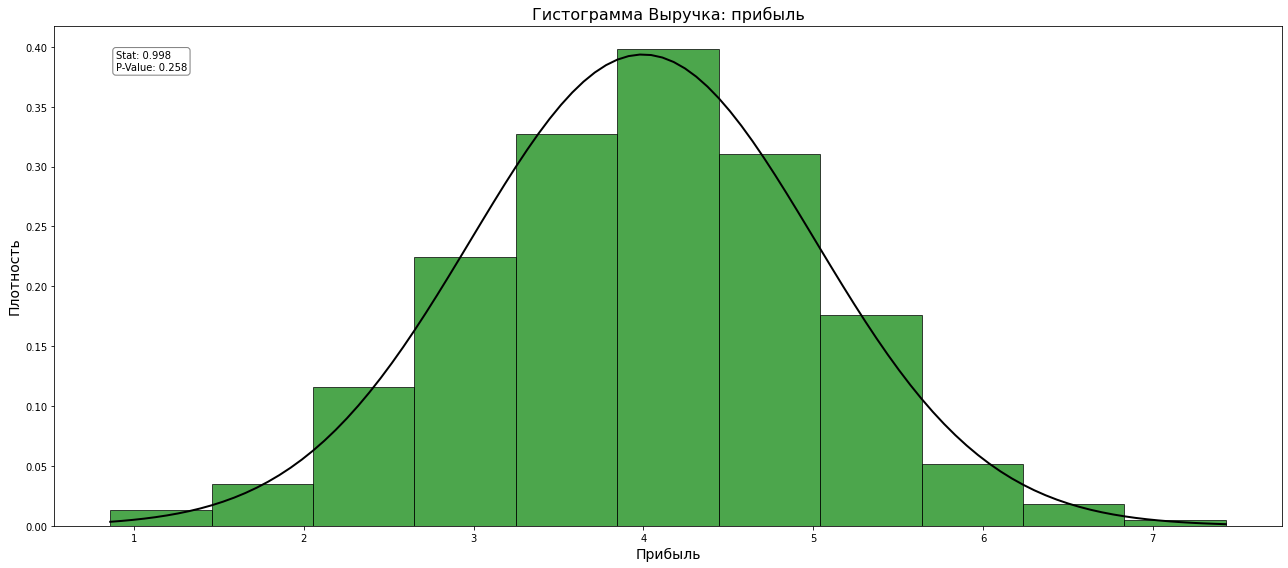

In [45]:
# Построение гистограммы
plt.hist(money_data['прибыль'], bins=bins, color='green', edgecolor='black', alpha=0.7, density=True)
plt.title(f'Гистограмма Выручка: {money_data["прибыль"].name}', fontsize=16)
plt.xlabel('Прибыль', fontsize=14)
plt.ylabel('Плотность', fontsize=14)

# Нормальная кривая
mu, std = norm.fit(money_data['прибыль'])  # Подсчет среднего и стандартного отклонения
x = np.linspace(money_data['прибыль'].min(), money_data['прибыль'].max(), 100)
p = norm.pdf(x, mu, std)  # Плотность нормального распределения
plt.plot(x, p, 'k', linewidth=2)  # Наложение нормальной кривой
    
# Проверка на нормальность с помощью теста Шапиро-Уилка
stat, p_value = shapiro(money_data['прибыль'])  # Удалена лишняя скобка
plt.text(0.05, 0.95, f'Stat: {stat:.3f}\nP-Value: {p_value:.3f}', 
         transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

Значение p-value 0,345 и значение stat 0,99 - очень хочется сказать, что значение близко к нормальному, выбросов не видно. Соотношении выручки и прибыли около 10%. </font><br>

#### Отбор клиентов
Нам нужно отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.</font><br>
Во второй таблице мы это уже сделали и сохранили id для удаления в параметре ids_to_remove. Удалим везде.

In [46]:
print(f'Количество уникальных id до удаления: {market_file_data["id"].nunique()}')
print(f'Количество уникальных id до удаления: {market_time_data["id"].nunique()}')
print(f'Количество уникальных id до удаления: {money_data["id"].nunique()}')

Количество уникальных id до удаления: 1300
Количество уникальных id до удаления: 1300
Количество уникальных id до удаления: 1300


In [47]:
market_file_data = market_file_data.query('id not in @ids_to_remove')
market_time_data = market_time_data.query('id not in @ids_to_remove')
money_data = money_data.query('id not in @ids_to_remove')

print(f'Количество уникальных id после: {market_file_data["id"].nunique()}')
print(f'Количество уникальных id после: {market_time_data["id"].nunique()}')
print(f'Количество уникальных id после: {money_data["id"].nunique()}')

Количество уникальных id после: 1296
Количество уникальных id после: 1296
Количество уникальных id после: 1296


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Супер! Здесь молодец, НЕ УПУСКАЕШЬ требование брифа в части обработки покупателей НЕ имеющих полной покупательской истории в крайние 3 месяца:
    
</div>

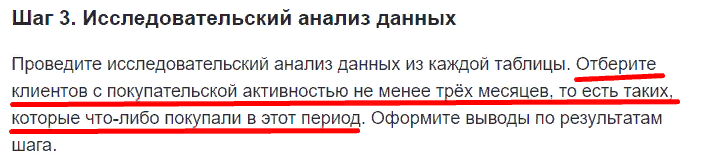

## Объединение таблиц
Нужно объединить таблицы `market_file.csv`, `market_money.csv`, `market_time.csv`. 

In [48]:
market_file_data.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2
5,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4


Посчитаем кол-во уникальных id.

In [49]:
market_file_data['id'].nunique()

1296

In [50]:
market_file_data.shape

(1296, 13)

In [51]:
market_money_data.head()

,id,период,выручка
3,215349,препредыдущий месяц,4472.0
4,215349,текущий месяц,4971.6
5,215349,предыдущий месяц,5216.0
6,215350,препредыдущий месяц,4826.0
7,215350,текущий месяц,5058.4


Преобразуем формат, чтобы данные о выручке у уникального id выводилось в строке.

In [52]:
pivot_table_mmd = market_money_data.pivot_table(index='id', columns='период', values='выручка', fill_value=0)
pivot_table_mmd.columns = ['выручка, предыдущий месяц', 'выручка, препредыдущий месяц', 'выручка, текущий месяц']
pivot_table_mmd

,"выручка, предыдущий месяц","выручка, препредыдущий месяц","выручка, текущий месяц"
id,,,
215349,5216.0,4472,4971.6
215350,5457.5,4826,5058.4
215351,6158.0,4793,6610.4
215352,5807.5,4594,5872.5
215353,4738.5,5124,5388.5
...,...,...,...
216643,3664.0,4704,4741.7
216644,4729.0,5299,5353.0
216645,5160.0,5334,5139.2


In [53]:
pivot_table_mmd.shape

(1296, 3)

Объединим первую и вторую таблицу.

In [54]:
data = pd.merge(market_file_data, pivot_table_mmd, on='id', how='left')
data.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, предыдущий месяц","выручка, препредыдущий месяц","выручка, текущий месяц"
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472,4971.6
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826,5058.4
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793,6610.4
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594,5872.5
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124,5388.5


In [55]:
data.shape

(1296, 16)

Посмотрим на 3 таблицу.

In [56]:
market_time_data.head()

,id,период,минут
2,215349,текущий месяц,10
3,215349,предыдущий месяц,12
4,215350,текущий месяц,13
5,215350,предыдущий месяц,8
6,215351,текущий месяц,13


Преобразуем формат, чтобы данные о выручке у уникального id выводилось в строке.

In [57]:
pivot_table_mtd = market_time_data.pivot_table(index='id', columns='период', values='минут', fill_value=0)
pivot_table_mtd.columns = ['минут,предыдущий месяц','минут, текущий месяц']
pivot_table_mtd

,"минут,предыдущий месяц","минут, текущий месяц"
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [58]:
pivot_table_mtd.shape

(1296, 2)

Объединим все в итоговый дата фрейм.

In [59]:
data = pd.merge(data, pivot_table_mtd, on='id', how='left')
data.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, предыдущий месяц","выручка, препредыдущий месяц","выручка, текущий месяц","минут,предыдущий месяц","минут, текущий месяц"
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124,5388.5,10,10


In [60]:
data.shape

(1296, 18)

Посмотрим на объединенные данные в разрезе признака "Покупательская активность". 

In [61]:
cat_cols = [
    'популярная категория', 
    'тип сервиса', 
    'разрешить сообщать',
    'покупательская активность'
]


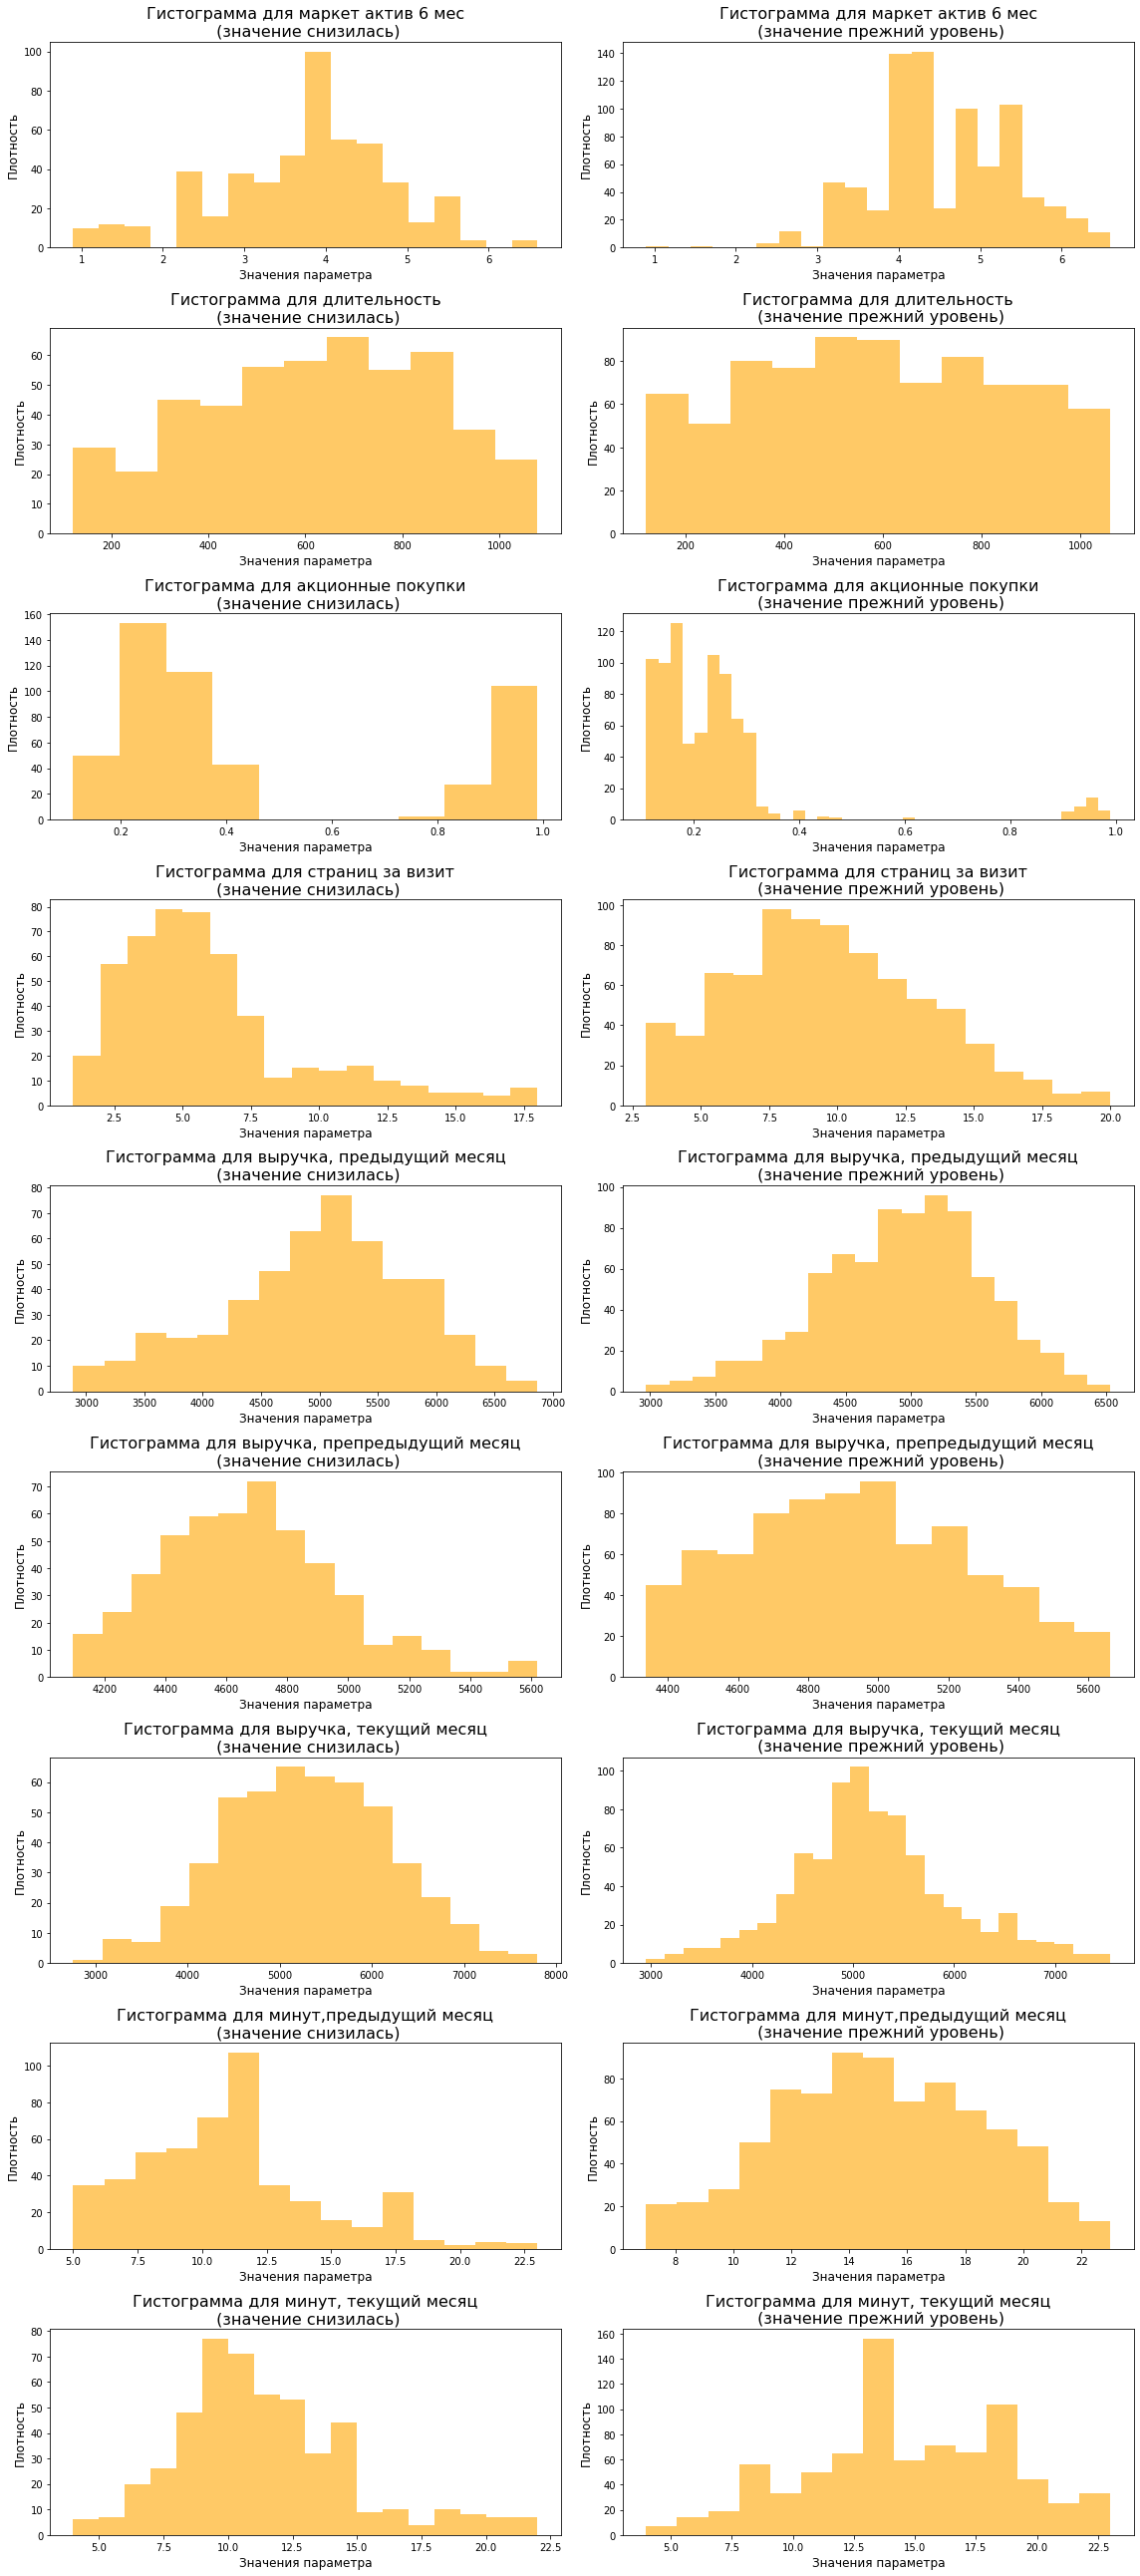

In [62]:
def plot_hist_check(a, c, b=None):
    # Выбор числовых столбцов
    numerical_data = a.select_dtypes(include='number')

    # Исключение указанных столбцов
    if b is not None:
        numerical_data = numerical_data.drop(columns=b, errors='ignore')
        
    # Получаем уникальные значения для столбца c
    unique_values = a[c].unique()

    # Определяем количество графиков и фигуру построения
    num_columns = numerical_data.shape[1]
    fig, axes = plt.subplots(nrows=num_columns, ncols=len(unique_values), figsize=(16, num_columns * 4))

    for i, column in enumerate(numerical_data.columns):
        for j, value in enumerate(unique_values):
            filtered_data = numerical_data[a[c] == value]  # Фильтрация данных по уникальному значению

            # Построение гистограммы
            ax = axes[i, j] if num_columns > 1 else axes[j]
            ax.hist(filtered_data[column], bins='auto', alpha=0.6, color='orange')
            ax.set_xlabel('Значения параметра', fontsize=12)
            ax.set_ylabel('Плотность', fontsize=12)
            ax.set_title(f'Гистограмма для {column}\n (значение {value})', fontsize=16)

    plt.tight_layout()
    plt.show()

# Пример вызова функции с исключением столбцов и указанием столбца c
a = data
b = ['id', 'маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса'] 
c = 'покупательская активность'  # Параметр для разбивки
plot_hist_check(a, c, b)

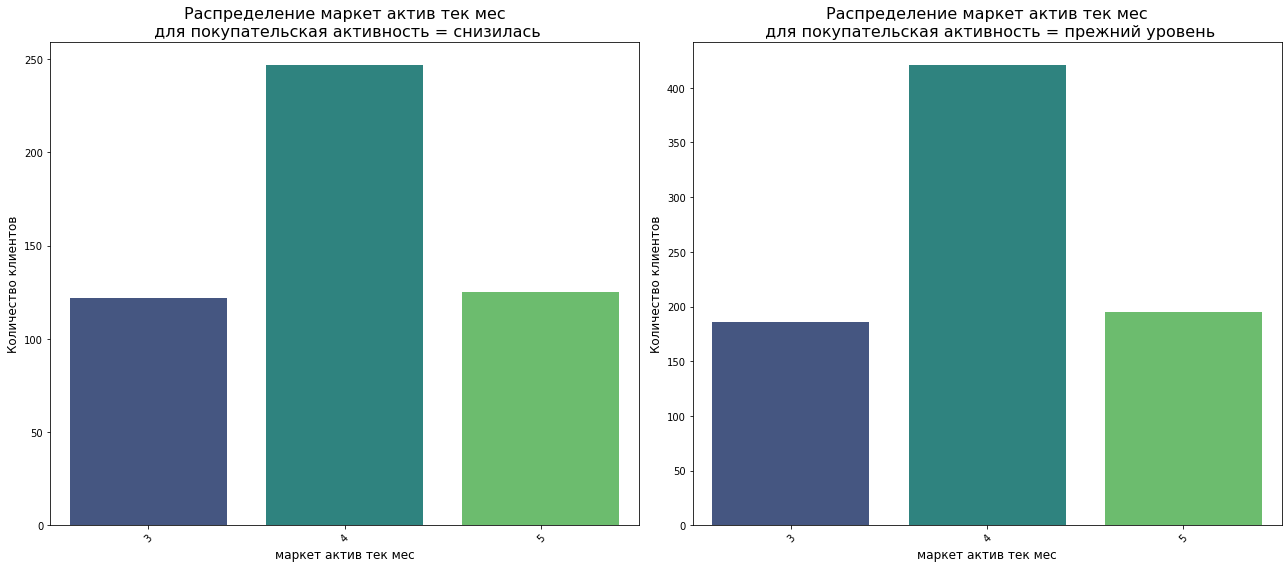

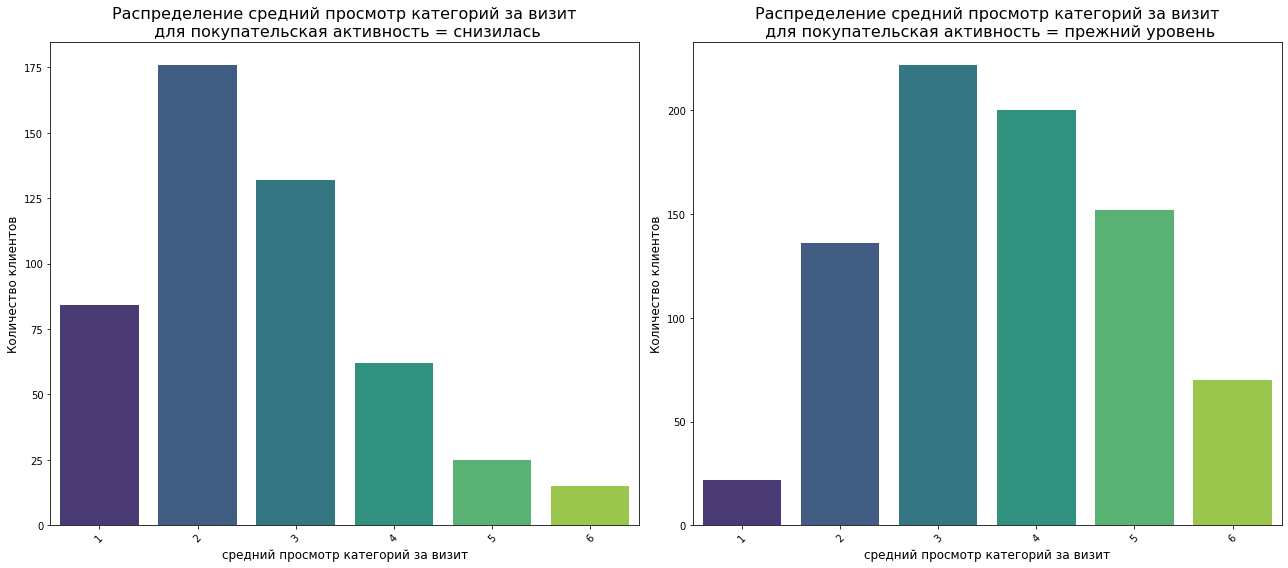

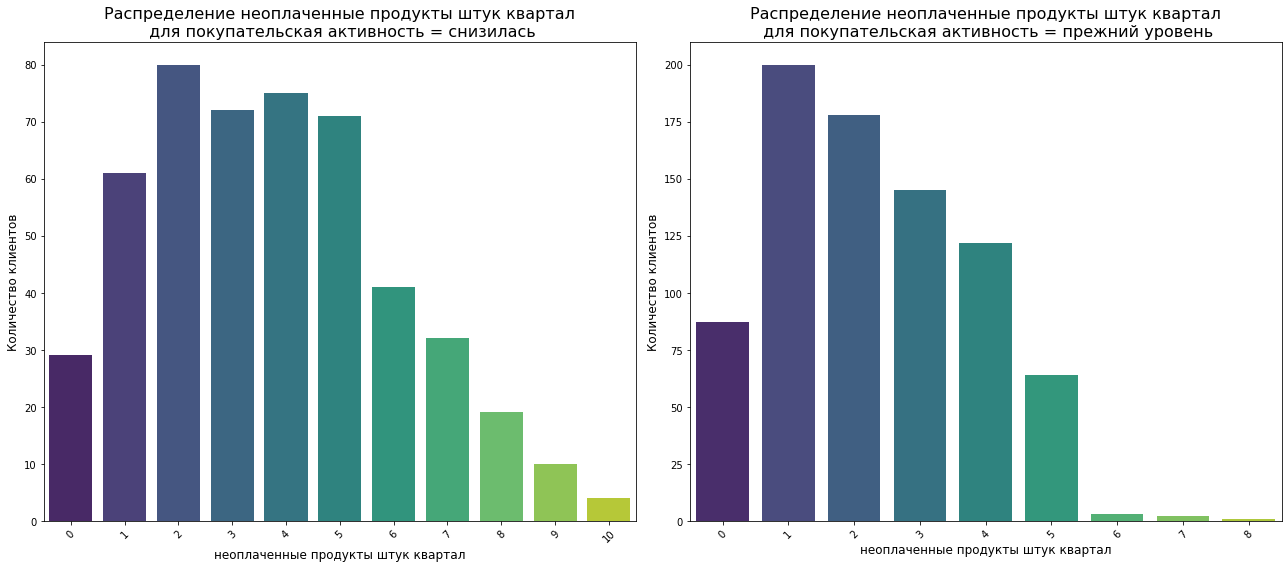

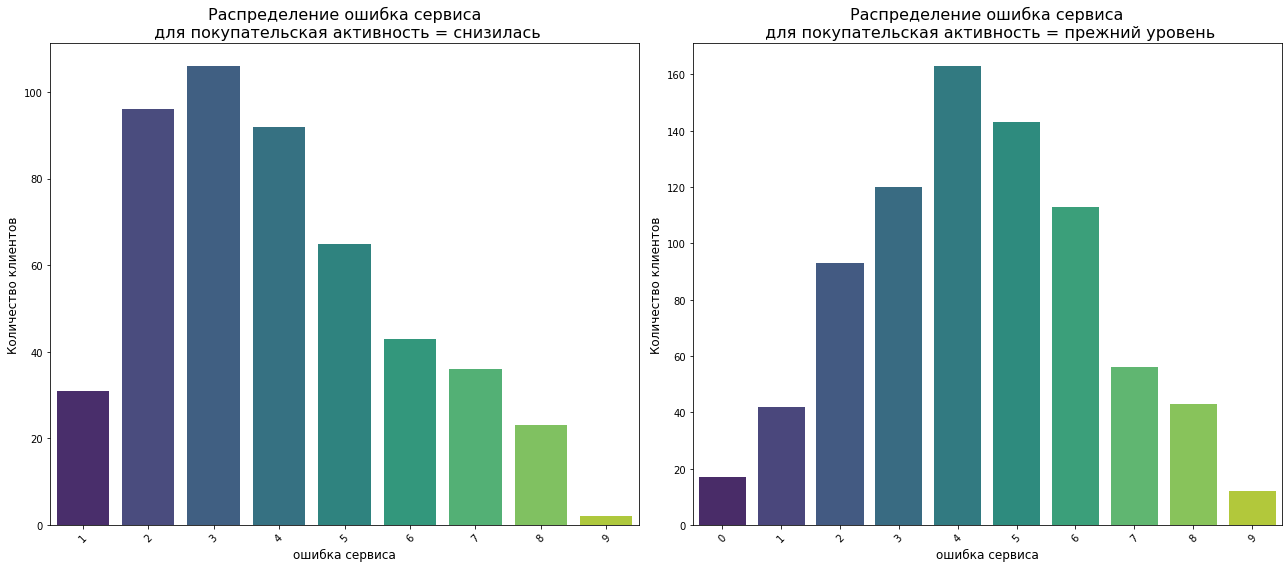

In [63]:
def plot_discrete_features_del(a, b, c):
    unique_values = a[c].unique()  # Получаем уникальные значения для столбца c

    for feature in b:
        # Устанавливаем фигуру для двух графиков
        plt.figure()

        for j, value in enumerate(unique_values):
            filtered_data = a[a[c] == value]  # Фильтрация данных по уникальному значению
            
            plt.subplot(1, len(unique_values), j + 1)  # Создание подграфика
            sns.countplot(x=feature, data=filtered_data, palette='viridis')
            plt.title(f'Распределение {feature}\n для {c} = {value}', fontsize=16)  
            plt.xlabel(feature, fontsize=12)  
            plt.ylabel('Количество клиентов', fontsize=12)  
            plt.xticks(rotation=45)  

        plt.tight_layout()
        plt.show()

# Пример вызова функции
a = data
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса']
c = 'покупательская активность'  # Параметр для разбивки
plot_discrete_features_del(a, b, c)

Объединенные данные в сравнении снизилась/прежний уровень активности.
- Видно, что маркет аквтиность у клиентов, у которых снизилась активность, ниже, чем у тех, кто на прежнем уровне.
- Снизилась активность больше у старых покупателей.
- Доля акционных покупок у тех, у кого снизилась марет актиновсть выше и достигает 2х пиков. Около 30% и 100%.
- Меньше смотрят категорий за визит, в среднем 2 (снизилась). 
- Больше и чаще встречаются неоплаченные продукты  4 / 1(снизилась).
- Ошибок сервиса больше у клиентов на прежнем уровне. 4 / 3.
- Меньше смотрят страниц - 5, у прежних - 7,5.
- Выручка текущий и предыдущие месяц юлизкие около 5000, а предпредыдущий у тех, у кого снизилась активность ниже около 4700.
- Меньше предыдущиий находятся на сайте 10 / 14, текущий еще больше снизился 9 к 13.

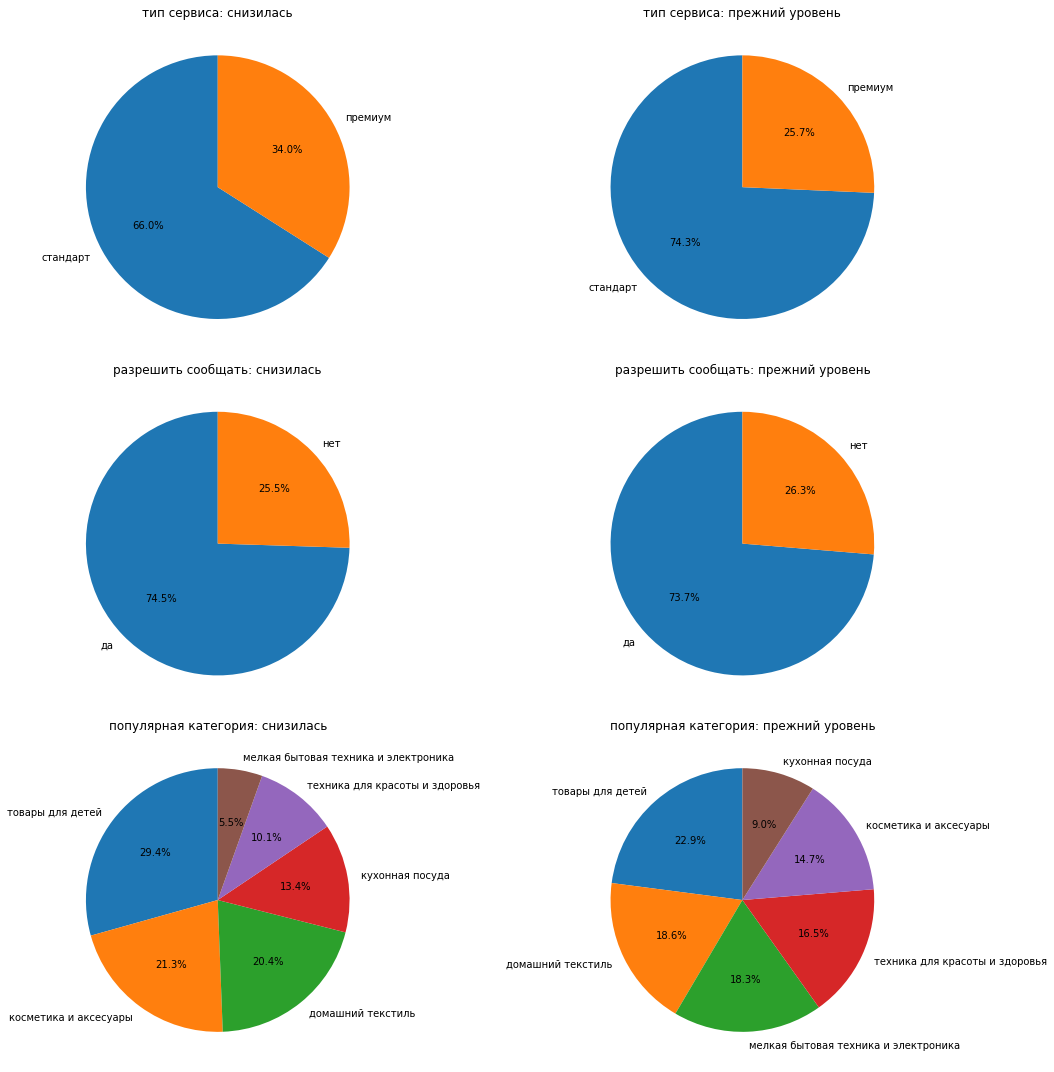

In [64]:
# Получаем уникальные значения для покупательской активности
activitys = data['покупательская активность'].unique()

# Определяем категориальные столбцы, исключая 'id'
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('покупательская активность')

# Настройка графиков
plt.figure(figsize=(15, 5 * len(categorical_cols)))

# Построение круговых диаграмм
for j, col in enumerate(categorical_cols):
    for i, activity in enumerate(activitys):
        plt.subplot(len(categorical_cols), len(activitys), j * len(activitys) + i + 1)
        
        # Получаем данные для текущей активности
        subset = data[data['покупательская активность'] == activity]
        
        # Подсчет значений
        value_counts = subset[col].value_counts()
        
        # Построение круговой диаграммы
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'{col}: {activity}', fontsize=12)

plt.tight_layout()
plt.show()

В категории снизилось:
- Доля примиум выше, чем в тех, кто остался на прежнем уровне.
- Снизилась доля категории Мелкая бытовая техника  и техника для красоты и здоровья.

## Корреляционный анализ
Проведем корреляционный анализ данных по общему дата фрейму `data`.

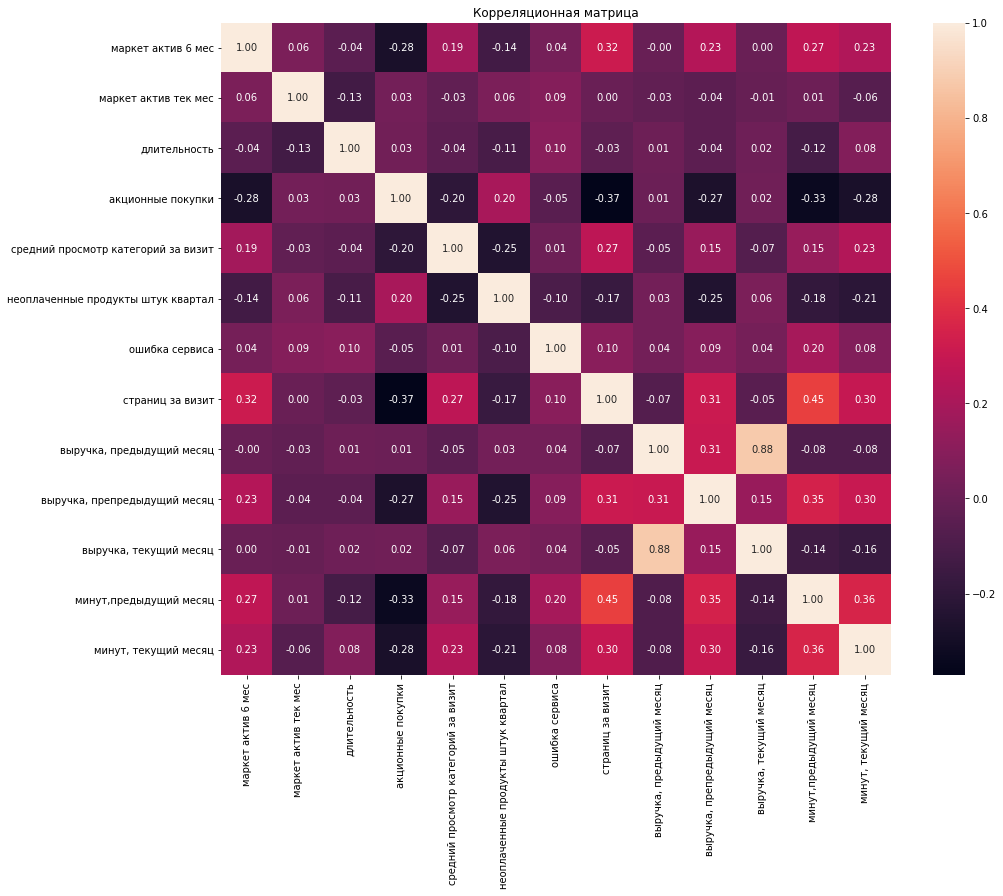

In [65]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.drop('id', axis=1).corr(method='spearman'), annot=True, fmt='.2f') 
plt.title('Корреляционная матрица')
plt.show()

По оценке корреляции Спирмана:</font><br>
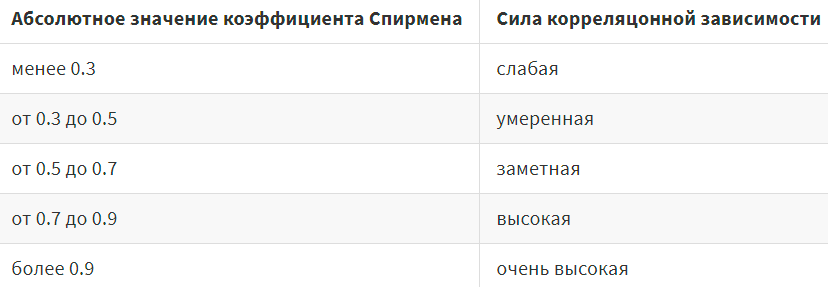


Видим следующую зависимость по данным корреляции и графикам:</font><br>

**высокая связь**</font><br>
- выручка за текущий месяц и выручка за предыдущий месяц - 0,88

Очень высокая связь и похоже на мультиколлинеарность.</font><br>
Попробуем объединить данный параметр в один. 

In [66]:
data['выручка_пред_тек'] = data['выручка, текущий месяц'] + data['выручка, предыдущий месяц']
data.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, предыдущий месяц","выручка, препредыдущий месяц","выручка, текущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472,4971.6,12,10,10187.6
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826,5058.4,8,13,10515.9
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793,6610.4,11,13,12768.4
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594,5872.5,8,11,11680.0
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124,5388.5,10,10,10127.0


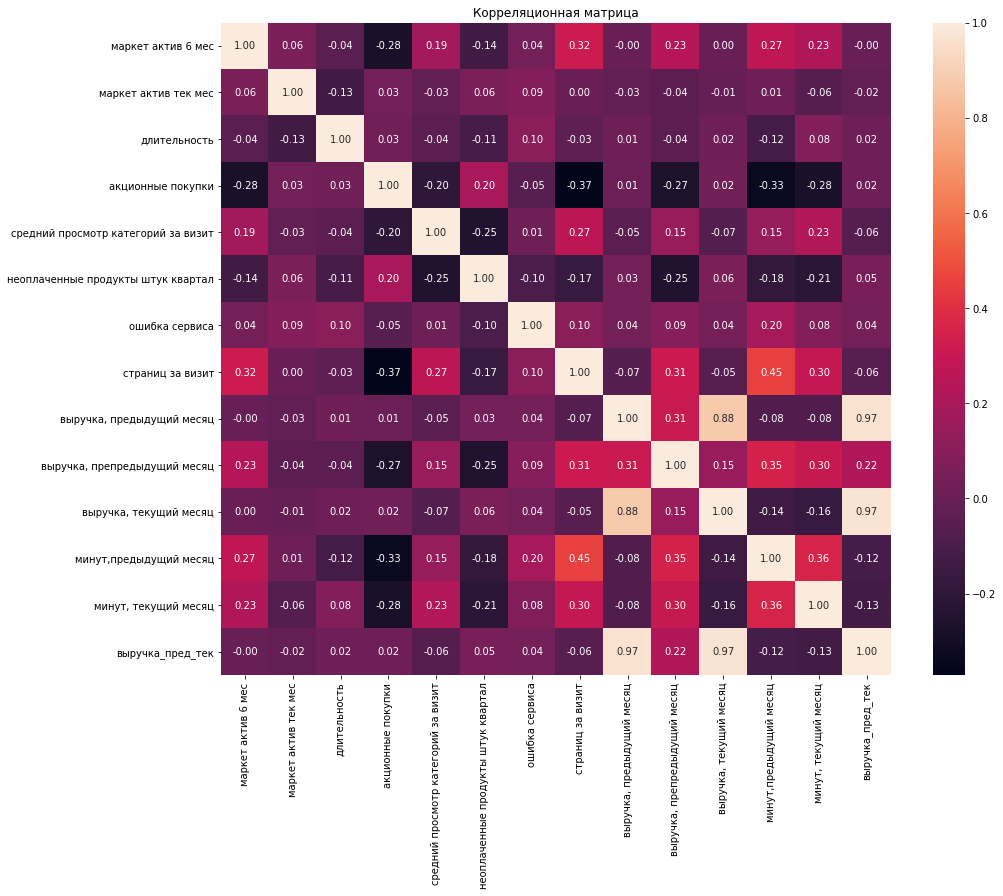

In [67]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.drop('id', axis=1).corr(method='spearman'), annot=True, fmt='.2f') 
plt.title('Корреляционная матрица')
plt.show()

У полученного столбца высокая корреляция только с теми столбцами, из которых он был получен, что логично.

## Использование пайплайнов
Подготовим данные для работы.

In [68]:
#разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(
        [
            'покупательская активность','выручка, текущий месяц', 'выручка, предыдущий месяц', 'id'
        ], 
            axis=1
    ),
    data['покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data['покупательская активность']
)

#кодирование целевого признака
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

#проверим размерность выборок
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((972, 15), (972,), (324, 15), (324,))

In [69]:
X_train.head()

,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек
506,стандарт,да,5.5,4,510,0.15,мелкая бытовая техника и электроника,2,4,7,16,4347,20,6,11184.7
10,стандарт,да,5.1,4,199,0.23,техника для красоты и здоровья,4,5,2,3,4597,11,13,10189.7
532,стандарт,да,4.3,5,997,0.17,мелкая бытовая техника и электроника,5,1,3,11,4626,13,10,7911.4
1212,стандарт,да,5.6,4,342,0.94,кухонная посуда,2,7,5,8,5269,14,19,9696.2
363,премиум,да,3.6,5,873,0.39,товары для детей,3,2,2,5,4691,10,10,8316.0


In [70]:
#категорияальные и количественные данные
ohe_columns = [
    'популярная категория',
    'разрешить сообщать'
]

ordinal_columns = [
    'тип сервиса'
]


num_columns = ['маркет актив 6 мес', 
               'маркет актив тек мес',
               'длительность',
               'акционные покупки',
               'средний просмотр категорий за визит',
               'неоплаченные продукты штук квартал',
               'ошибка сервиса',
               'страниц за визит',
               'выручка, препредыдущий месяц',
               'минут,предыдущий месяц',
               'минут, текущий месяц',
               'выручка_пред_тек'
] 


In [71]:
#пайплайн для кодирования категориальных данных
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        ),
        (
            'ordinal', 
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        )
    ]
) 



In [72]:
#работа с кодирование и масштабированием категориальных и количественных данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', StandardScaler(), num_columns),
        ('ordinal', ohe_pipe, ordinal_columns),
    ], 
    remainder='passthrough'
) 


In [73]:
# итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)


In [74]:
#перебираются четыре варианта масштабирования и четыре модели
param_grid = {
    'preprocessor__num': [
        StandardScaler(), 
        MinMaxScaler(),  
        'passthrough'
    ],
    'models': [
        DecisionTreeClassifier(random_state=RANDOM_STATE), 
        SVC(random_state=RANDOM_STATE),
        KNeighborsClassifier(),
        LogisticRegression(random_state=RANDOM_STATE)
        ]
}


In [75]:
# перебор параметров для работы с моделями

param_distributions = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,12),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    # словарь для модели SVC() 
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['rbf', 'poly'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

## Поиск лучшей модели и параметров. 

In [76]:
# поиск лучшей модели без перебора гиперпараметров
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1
)

grid.fit(X_train, y_train)

# выведите параметры лучшей модели
print('Лучшая модель и её параметры:\n\n',grid.best_params_)


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Лучшая модель и её параметры:

 {'models': SVC(random_state=42), 'preprocessor__num': StandardScaler()}


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
#вывод метрики лучшей модели
print('Метрика ROC-AUC для лучшей модели:\n', round(grid.best_score_, 4)) 

Метрика ROC-AUC для лучшей модели:
 0.9084


Лучшая модель определилась как SVC. Посмотрим на данных по подбору гиперпараметров.</font><br>
Для оценки модели выбрала метрку ROC-AUC, так как данная метрика устойчива к несбалансированным данным и не зависит от порога вероятности.

In [78]:
grid_param = GridSearchCV(
    pipe_final, 
    param_grid=param_distributions, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1
)

grid_param.fit(X_train, y_train)

# выведите параметры лучшей модели
print('Лучшая модель и её параметры:\n\n',grid_param.best_params_)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Лучшая модель и её параметры:

 {'models': SVC(probability=True, random_state=42), 'models__kernel': 'rbf', 'preprocessor__num': StandardScaler()}


In [79]:
#вывод метрики лучшей модели
print('Метрика ROC-AUC для лучшей модели:\n', round(grid_param.best_score_, 4)) 

Метрика ROC-AUC для лучшей модели:
 0.9084


Лучшей моделью снова оказалась модель SVC и оценка метрики ROC-AUC = 0.91.

In [80]:
preds = grid_param.best_estimator_.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,preds[:,1])
roc_auc

0.9118229988270032

На тестовых данных качество модели стало лучше.

## Анализ важности признаков
Оценим важность признаков в модели.

/tmp/ipykernel_110/2616295905.py:23: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(X_encoded_train, plot_type='bar', feature_names=feature_names)


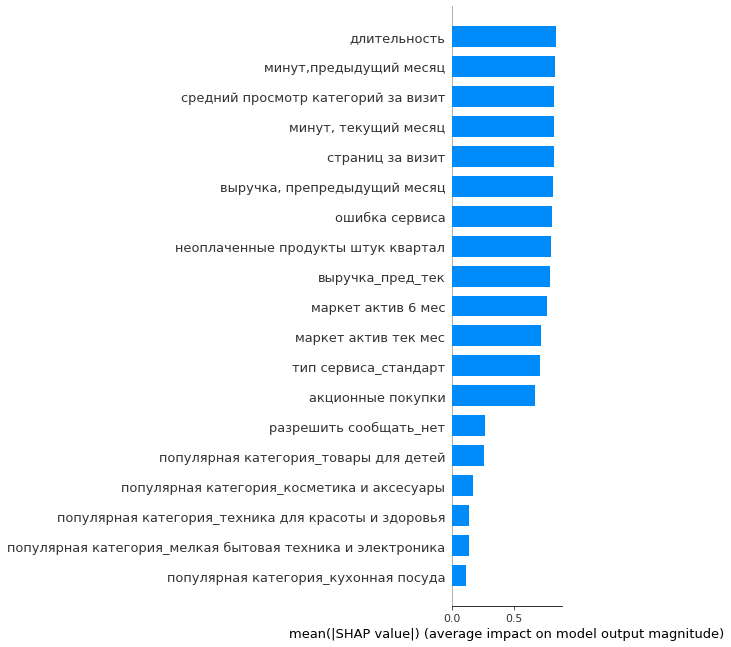

In [81]:
# Преобразуем обучающие данные
X_encoded_train = grid_param.best_estimator_.named_steps['preprocessor'].fit_transform(X_train)
# Обучаем лучшую модель
model_best = grid_param.best_estimator_.named_steps['models'].fit(X_encoded_train, y_train)

# Извлекаем шаг 'preprocessor'
preprocessor = grid_param.best_estimator_.named_steps['preprocessor']

# Получение имен признаков
feature_names = []

# Предположим, у вас есть колонки для OneHotEncoder и числовые колонки
ohe_columns = preprocessor.named_transformers_['ohe'].get_feature_names_out()
num_columns = preprocessor.named_transformers_['num'].get_feature_names_out()
ordinal_columns = preprocessor.named_transformers_['ordinal'].get_feature_names_out()

# Добавляем OHE и числовые имена признаков
feature_names.extend(ohe_columns)
feature_names.extend(num_columns)
feature_names.extend(ordinal_columns)

explainer_1 = shap.PermutationExplainer(model_best, X_encoded_train)
shap.summary_plot(X_encoded_train, plot_type='bar', feature_names=feature_names) 

По диаграмме видны самые выжные параметры, которые влияют на модель и доля у них близкая:
- длительность,сколько дней прошло с момента регистрации покупателя на сайте
- минут, которые клиент провел на сайте в предыдущем и текущем месяце
- средний просмотр категорий за визит
- сколько страниц за визит было просмотрено
- выручка за предыдущие 3 месяца
- ошибка сервиса
- неоплаченные продукты 
- маркет актив 6 мес и тек месяц
- тип сервиса: стандрат
- акционные покупки

## Сегментация покупателей

### Оценка прибыльности
Посмотрим сначала на данные по прибыльности на основных данных.

In [82]:
data = pd.merge(data , money_data, on='id', how='left')
data.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, предыдущий месяц","выручка, препредыдущий месяц","выручка, текущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,прибыль
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472,4971.6,12,10,10187.6,4.16
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826,5058.4,8,13,10515.9,3.13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793,6610.4,11,13,12768.4,4.87
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594,5872.5,8,11,11680.0,4.21
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,4738.5,5124,5388.5,10,10,10127.0,3.95


Мы смотрим прибыль за 3 месяца. Посчитаем и выручку за 3 месяца.

In [83]:
data['выручка_3'] = data['выручка, препредыдущий месяц'] + data['выручка_пред_тек']
data.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,...,ошибка сервиса,страниц за визит,"выручка, предыдущий месяц","выручка, препредыдущий месяц","выручка, текущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,прибыль,выручка_3
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,...,2,5,5216.0,4472,4971.6,12,10,10187.6,4.16,14659.6
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,...,1,5,5457.5,4826,5058.4,8,13,10515.9,3.13,15341.9
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,...,6,4,6158.0,4793,6610.4,11,13,12768.4,4.87,17561.4
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,...,3,2,5807.5,4594,5872.5,8,11,11680.0,4.21,16274.0
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,...,1,4,4738.5,5124,5388.5,10,10,10127.0,3.95,15251.0


Посмотрим на данные прибыли детально в объединенной таблице.

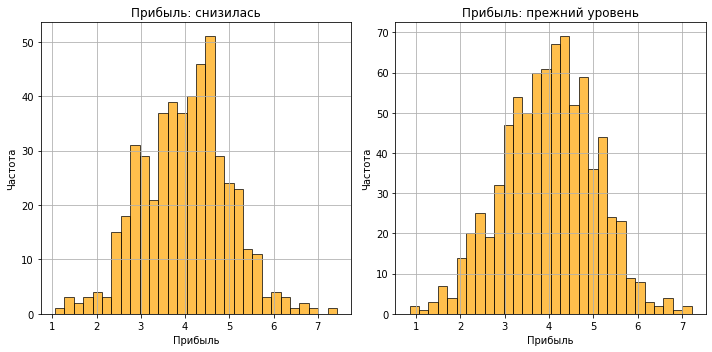

In [84]:
plt.figure(figsize=(10, 5))

for i, activity in enumerate(activitys):
    plt.subplot(1, len(activitys), i + 1)
    data[
        data['покупательская активность'] == activity]['прибыль'].hist(bins=30, color='orange', edgecolor='black', alpha=0.7)
    plt.title(f'Прибыль: {activity}', fontsize=12)
    plt.xlabel('Прибыль', fontsize=10)
    plt.ylabel('Частота', fontsize=10)

plt.tight_layout()
plt.show()

Видно, что те, у кого снизилась активность приносят меньше прибыли, но в общей картине данные сильно не отличаются. </font><br>
Посмотрим более подробно в разрезе категорий по медиане.

Посмотрим детально по месяцам.

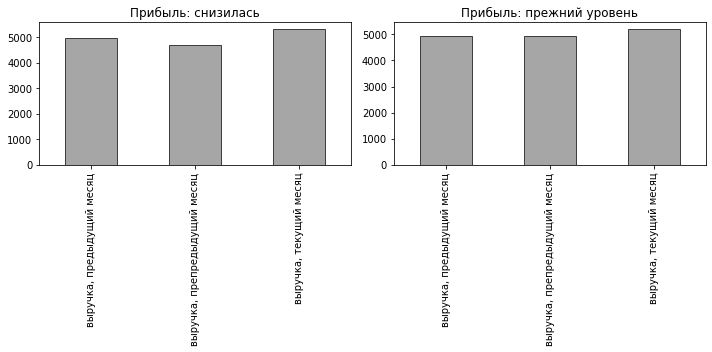

In [85]:
test = ['выручка, предыдущий месяц', 'выручка, препредыдущий месяц', 'выручка, текущий месяц']
plt.figure(figsize=(10, 5))

for i, activity in enumerate(activitys):
    plt.subplot(1, len(activitys), i + 1)
    data[
        data['покупательская активность'] == activity][test].mean().plot(kind='bar', 
                                                                         color='grey', edgecolor='black', alpha=0.7)
    plt.title(f'Прибыль: {activity}', fontsize=12)

plt.tight_layout()
plt.show()

Видно, что те, у кого снизилась активность 3 месяца назад выручка была меньше, чем у тех, у кого остался прежний уровень. Но предыдущий и текущий на близком уровне.

In [86]:
data_maj = data.pivot_table(
    index='популярная категория',
    columns='покупательская активность', 
    values={'прибыль','выручка_3'}, 
    aggfunc='median')
data_maj.columns = ['выручка_преж','выручка_сниз','прибыль_преж','прибыль_сниз']
data_maj['% выручки'] = round(1 - data_maj['выручка_преж']/data_maj['выручка_сниз'],2)
data_maj['% прибыли'] = round(1 - data_maj['прибыль_преж']/data_maj['прибыль_сниз'],2)
data_maj.sort_values(by = 'выручка_преж',ascending = False)

,выручка_преж,выручка_сниз,прибыль_преж,прибыль_сниз,% выручки,% прибыли
популярная категория,,,,,,
кухонная посуда,15651.15,15654.7,4.15,3.985,0.00,-0.04
домашний текстиль,15378.40,15145.7,4.20,3.890,-0.02,-0.08
косметика и аксесуары,15249.05,15294.6,4.14,4.170,0.00,0.01
мелкая бытовая техника и электроника,15087.50,15496.9,3.95,4.010,0.03,0.01
товары для детей,14811.15,14358.9,4.00,4.160,-0.03,0.04
техника для красоты и здоровья,14521.80,14463.7,3.75,3.895,-0.00,0.04


Данные прибыли практически пропорциональны данным выручки. Есть небольшие изменения, которые возможно связаны с покупкой промо товара.</font><br>
Посмотрим данные в абсолютных значениях

In [87]:
data_maj = data.pivot_table(
    index='популярная категория',
    columns='покупательская активность', 
    values={'прибыль','выручка_3'}, 
    aggfunc='sum')
data_maj.columns = ['выручка_преж','выручка_сниз','прибыль_преж','прибыль_сниз']
data_maj['% выручки'] = round(1 - data_maj['выручка_сниз']/data_maj['выручка_преж'],2)
data_maj['% прибыли'] = round(1 - data_maj['прибыль_сниз']/data_maj['прибыль_преж'],2)
data_maj.sort_values(by = 'выручка_преж',ascending = False)

,выручка_преж,выручка_сниз,прибыль_преж,прибыль_сниз,% выручки,% прибыли
популярная категория,,,,,,
товары для детей,2724415.7,2073541.9,736.33,593.80,0.24,0.19
домашний текстиль,2292409.4,1534500.5,615.11,387.88,0.33,0.37
мелкая бытовая техника и электроника,2232172.1,412785.2,577.86,107.42,0.82,0.81
техника для красоты и здоровья,1928351.5,707606.2,494.01,196.43,0.63,0.60
косметика и аксесуары,1792368.4,1619472.3,480.79,430.75,0.10,0.10
кухонная посуда,1111401.1,1039185.7,300.35,260.29,0.06,0.13


Сильнее всего просели продажи по мелкой бытовой техники, техника для красоты и здоровья и домашний текстиль. Данные прибыли практически пропорциональны данным выручки, будем ориентироваться в тестовых данных на нее.

### Определение порогов снижения активности
Нужно выполнить сегментацию покупателей по следующим параметрам. Выполним ее на тестовых данных.</font><br>
Определение классов:</font><br>
0 - остался на прежнем уровне</font><br>
1 - снизилась активность</font><br>

Нам нужно определить пороги по параметрам, когда клиент приближается к классу 1..</font><br>

In [88]:
X_test['вероятность снижения'] = preds[:, 1]
data_new = X_test.sort_values(by='вероятность снижения',ascending=False)
data_new.head(10)

,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения
91,премиум,да,3.1,4,893,0.24,кухонная посуда,2,4,3,2,4691,5,8,12670.1,0.999992
108,стандарт,да,3.5,3,720,0.30,домашний текстиль,2,6,4,2,4729,10,11,11927.9,0.997423
227,стандарт,нет,3.6,3,710,0.36,товары для детей,3,5,2,1,4393,6,11,11719.4,0.997217
24,премиум,да,3.0,4,558,0.89,товары для детей,3,3,7,4,4715,8,9,10886.6,0.995351
299,стандарт,нет,2.4,3,715,0.40,кухонная посуда,3,5,5,5,4217,10,8,10607.7,0.995046
85,премиум,да,2.4,3,602,0.32,косметика и аксесуары,2,5,3,3,4875,10,6,9821.6,0.994826
232,стандарт,нет,3.4,4,731,0.34,косметика и аксесуары,3,2,6,2,4470,6,11,11677.9,0.994668
276,стандарт,да,4.0,4,618,0.93,товары для детей,3,5,2,2,4566,9,10,7631.0,0.994496
226,стандарт,да,2.4,4,699,0.35,мелкая бытовая техника и электроника,2,4,5,3,4778,10,7,11130.2,0.994359
311,стандарт,да,2.6,4,302,0.28,товары для детей,1,2,5,4,4291,5,6,10786.4,0.994209


In [89]:
data_new.describe()

,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,4.216049,3.962963,590.969136,0.327099,3.330247,2.734568,4.157407,8.145062,4826.731481,13.243827,13.030864,10158.986420,0.388157
std,1.048302,0.662006,243.995011,0.254989,1.380608,1.810849,1.986777,4.057704,315.802313,3.946130,4.373326,1466.772942,0.387525
min,0.900000,3.000000,129.000000,0.110000,1.000000,0.000000,0.000000,1.000000,4138.000000,5.000000,4.000000,6038.300000,0.017306
25%,3.800000,4.000000,407.000000,0.170000,2.000000,1.000000,3.000000,5.000000,4595.000000,10.000000,10.000000,9210.150000,0.068104
50%,4.200000,4.000000,594.500000,0.240000,3.000000,3.000000,4.000000,8.000000,4794.500000,13.000000,13.000000,10218.500000,0.154823
75%,4.900000,4.000000,786.000000,0.310000,4.000000,4.000000,6.000000,11.000000,5024.250000,16.000000,16.000000,11232.175000,0.900893
max,6.600000,5.000000,1061.000000,0.990000,6.000000,10.000000,9.000000,20.000000,5624.000000,22.000000,23.000000,13870.800000,0.999992



**Определение классов:**</font><br>
0 - остался на прежнем уровне</font><br>
1 - снизилась активность</font><br>

Нам нужно определить клиентов, у которых высокая вероятность принадлежности к 1 классу.</font><br>

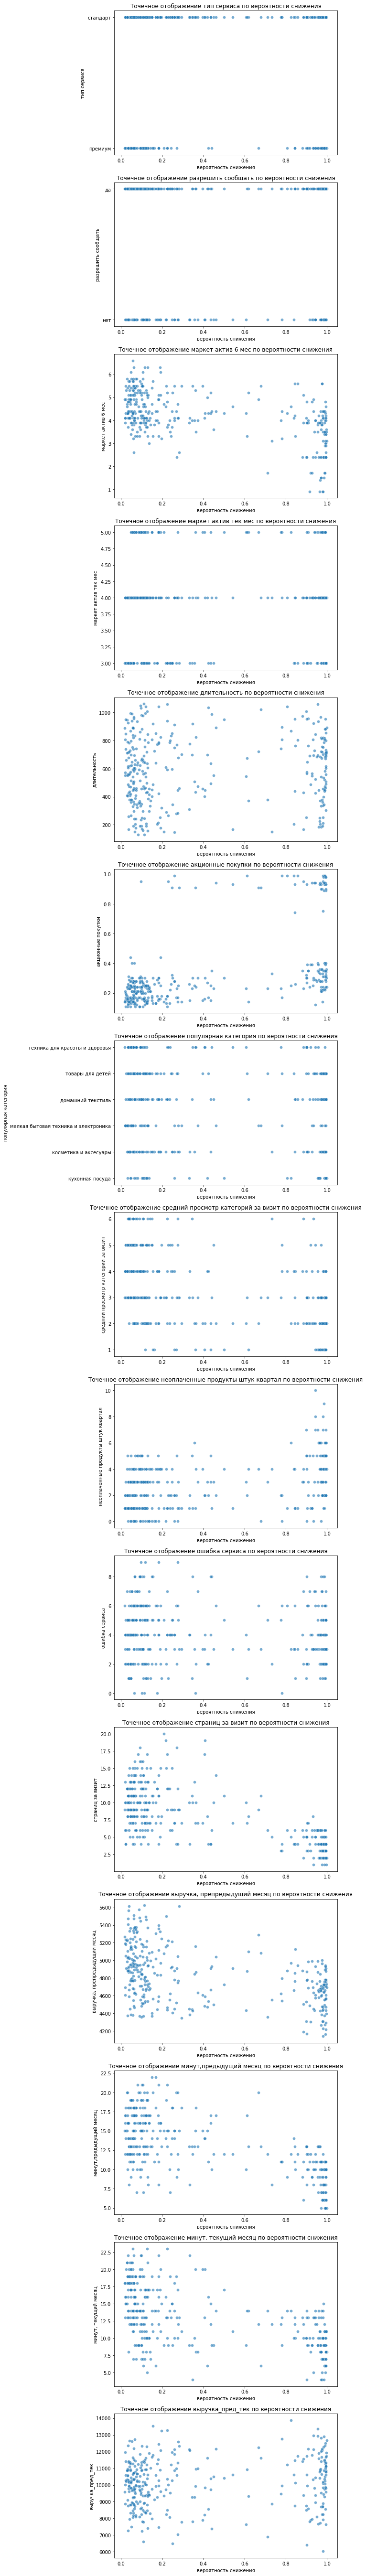

In [90]:
columns = X_test.columns.tolist()
columns.remove('вероятность снижения')

# Настройка графиков
plt.figure(figsize=(10, 5 * len(columns)))

# Построение точечных графиков
for i, col in enumerate(columns):
    plt.subplot(len(columns), 1, i + 1)
    sns.scatterplot(data=X_test, x='вероятность снижения', y=col, alpha=0.6)
    plt.title(f'Точечное отображение {col} по вероятности снижения')
    plt.xlabel('вероятность снижения')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

По графикам можно выделить следующие пороги:</font><br>
- `Акционные_покупки`, при доли акционных покупок выше 0,4 отмечается риск снижения активности
- `Страниц_за_визит`, если клиент смотрит ниже 5 страниц.
- `Неоплаченные_продукты_штук_квартал`, если у клиента накопилось более 6 продуктов.
- `Выручка_предпред`, если у клиента выручки 2 месяца назад была менее 4400.
- `Минут предыд` и `Минут тек`, если клиент провел на сайте меньге 7,5 минут.
- `Маркет_актив_6_мес`, если количество маркет рассылок и коммуникаций ниже 3.
- `Средний_просмотр_категорий_за_визит`, если просмотр категорий за визит ниже 2.

Эти показатели были важныными параметрами для модели. </font><br>
Так же важные:</font><br>
- длительность
- ошибка сервиса
- маркет активность тек.месяца

По этим параметрам сложно выявить границу перехода.</font><br>

In [91]:
filter_conditions = {
    'акционные_покупки': 'доля акционных покупок > 0.4',
    'страниц_за_визит': 'количество страниц < 5',
    'неоплаченные_продукты_штук_квартал': 'количество неоплаченных продуктов > 6',
    'выручка_предпред': 'выручка 2 месяца назад < 4400',
    'минут_предыд': 'минуты на сайте < 7.5',
    'минут_тек': 'минуты на сайте < 7.5',
    'маркет_актив_6_мес': 'количество маркетинговых рассылок < 3',
    'средний_просмотр_категорий_за_визит': 'просмотр категорий < 2'
}

### **Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.**
При доле акционных покупок выше 0,4 отмечается риск снижения активности. Отфильтруем тестовые данные и выделим вероятность снижения более 70%.</font><br>

In [92]:
data_1 = data_new.query('`акционные покупки` >= 0.4 and `вероятность снижения` >= 0.7')
data_1.head()

,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения
24,премиум,да,3.0,4,558,0.89,товары для детей,3,3,7,4,4715,8,9,10886.6,0.995351
299,стандарт,нет,2.4,3,715,0.40,кухонная посуда,3,5,5,5,4217,10,8,10607.7,0.995046
276,стандарт,да,4.0,4,618,0.93,товары для детей,3,5,2,2,4566,9,10,7631.0,0.994496
235,премиум,да,4.6,4,800,0.93,домашний текстиль,4,2,5,4,4912,7,7,11100.7,0.993932
318,стандарт,да,4.1,4,490,0.98,кухонная посуда,3,7,3,2,4563,9,11,11138.1,0.993929


In [93]:
data_1.describe()

,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,3.413158,3.973684,591.184211,0.877895,2.684211,4.131579,3.789474,4.263158,4673.421053,9.921053,9.921053,10605.878947,0.951124
std,1.141401,0.636156,222.449855,0.174684,1.164921,2.256175,1.832999,1.266709,207.841628,2.084454,2.352475,1337.186687,0.060290
min,0.900000,3.000000,167.000000,0.400000,1.000000,0.000000,1.000000,2.000000,4190.000000,5.000000,4.000000,7631.000000,0.780518
25%,2.525000,4.000000,466.000000,0.900000,2.000000,3.000000,2.250000,4.000000,4567.250000,8.250000,9.000000,9849.625000,0.940758
50%,3.850000,4.000000,561.000000,0.935000,3.000000,4.000000,3.500000,4.000000,4719.000000,10.000000,10.000000,10695.700000,0.980467
75%,4.100000,4.000000,749.500000,0.972500,3.000000,5.000000,5.000000,5.000000,4790.250000,11.000000,11.000000,11421.225000,0.990788
max,5.600000,5.000000,1041.000000,0.990000,6.000000,10.000000,8.000000,6.000000,4990.000000,14.000000,14.000000,12917.000000,0.995351


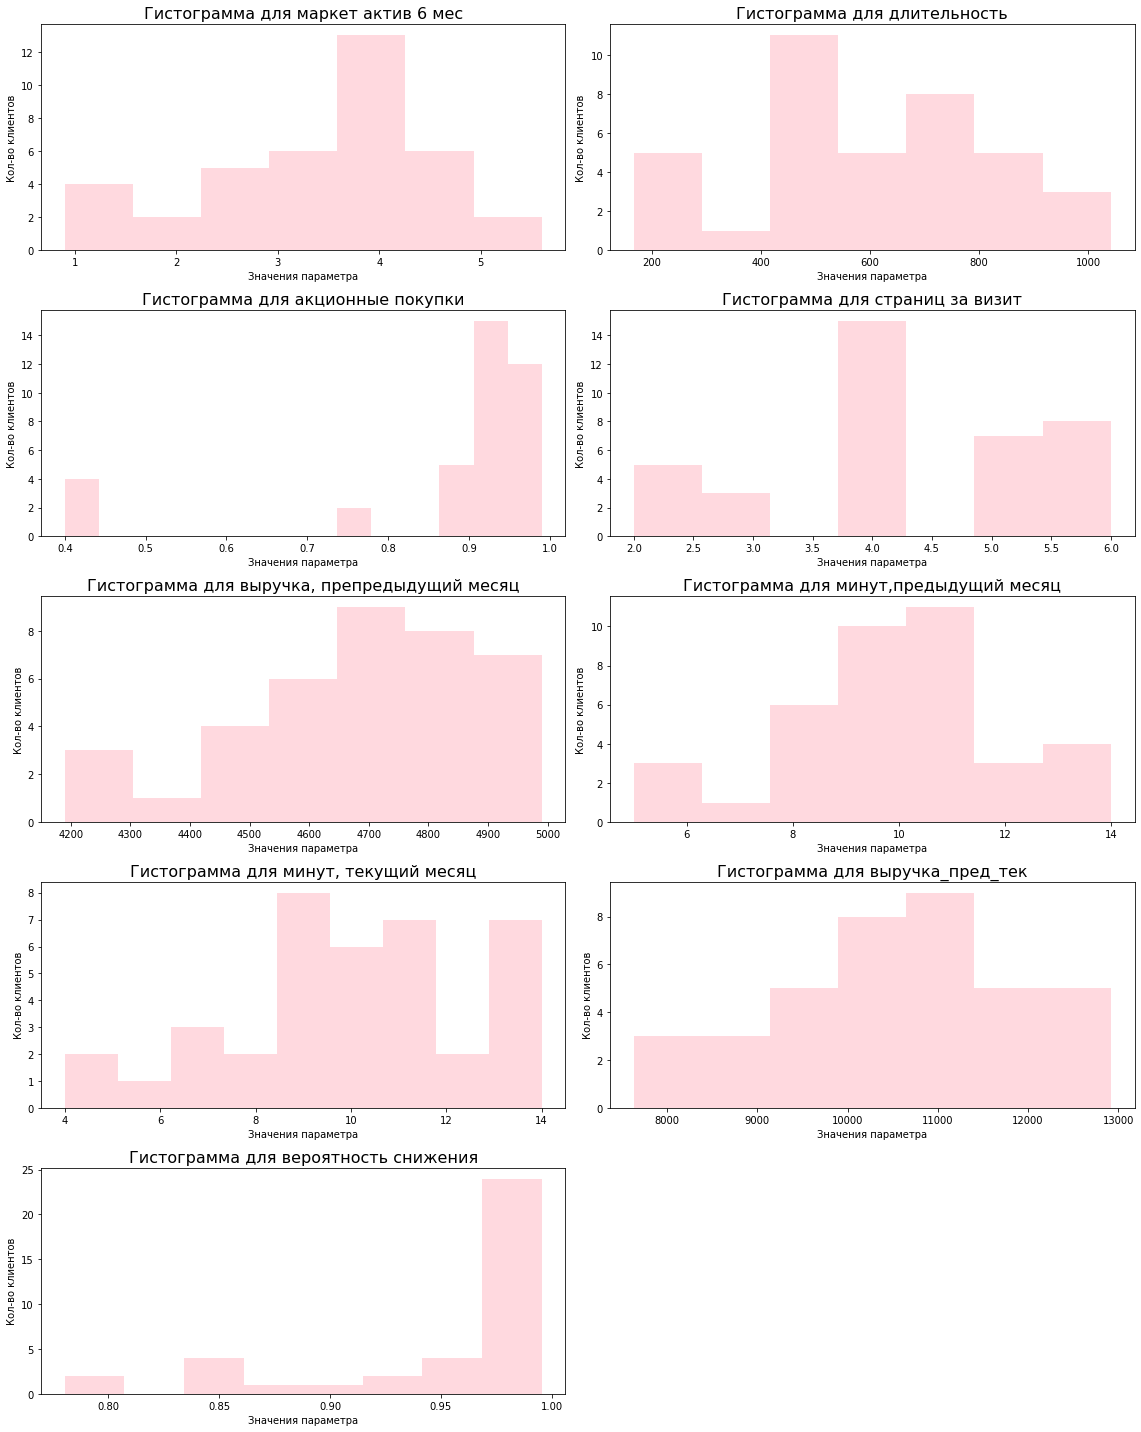

In [94]:
def plot_hist_fin(a, b=None):
    # Выбор числовых столбцов
    numerical_data = a.select_dtypes(include='number')

    # Исключение указанных столбцов
    if b is not None:
        numerical_data = numerical_data.drop(columns=b, errors='ignore')

    # Определяем количество графиков и фигуру построения
    num_columns = numerical_data.shape[1]
    num_rows = (num_columns + 1) // 2  # Количество строк, чтобы разместить по 2 графика в строке
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 4 * num_rows))

    # Проходим по числовым столбцам и строим гистограммы
    for i, column in enumerate(numerical_data.columns):
        row = i // 2  # Индекс строки
        col = i % 2   # Индекс столбца
        
        # Построение гистограммы
        axes[row, col].hist(numerical_data[column], bins='auto', alpha=0.6, color='pink')
        axes[row, col].set_xlabel('Значения параметра')
        axes[row, col].set_ylabel('Кол-во клиентов')
        axes[row, col].set_title(f'Гистограмма для {column}',fontsize=16)

    # Удаление пустых подграфиков, если количество столбцов нечетное
    if num_columns % 2 != 0:
        axes[-1, -1].axis('off')

    plt.tight_layout()
    plt.show()

#вызов функции
a = data_1
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса'] 
plot_hist_fin(a, b)

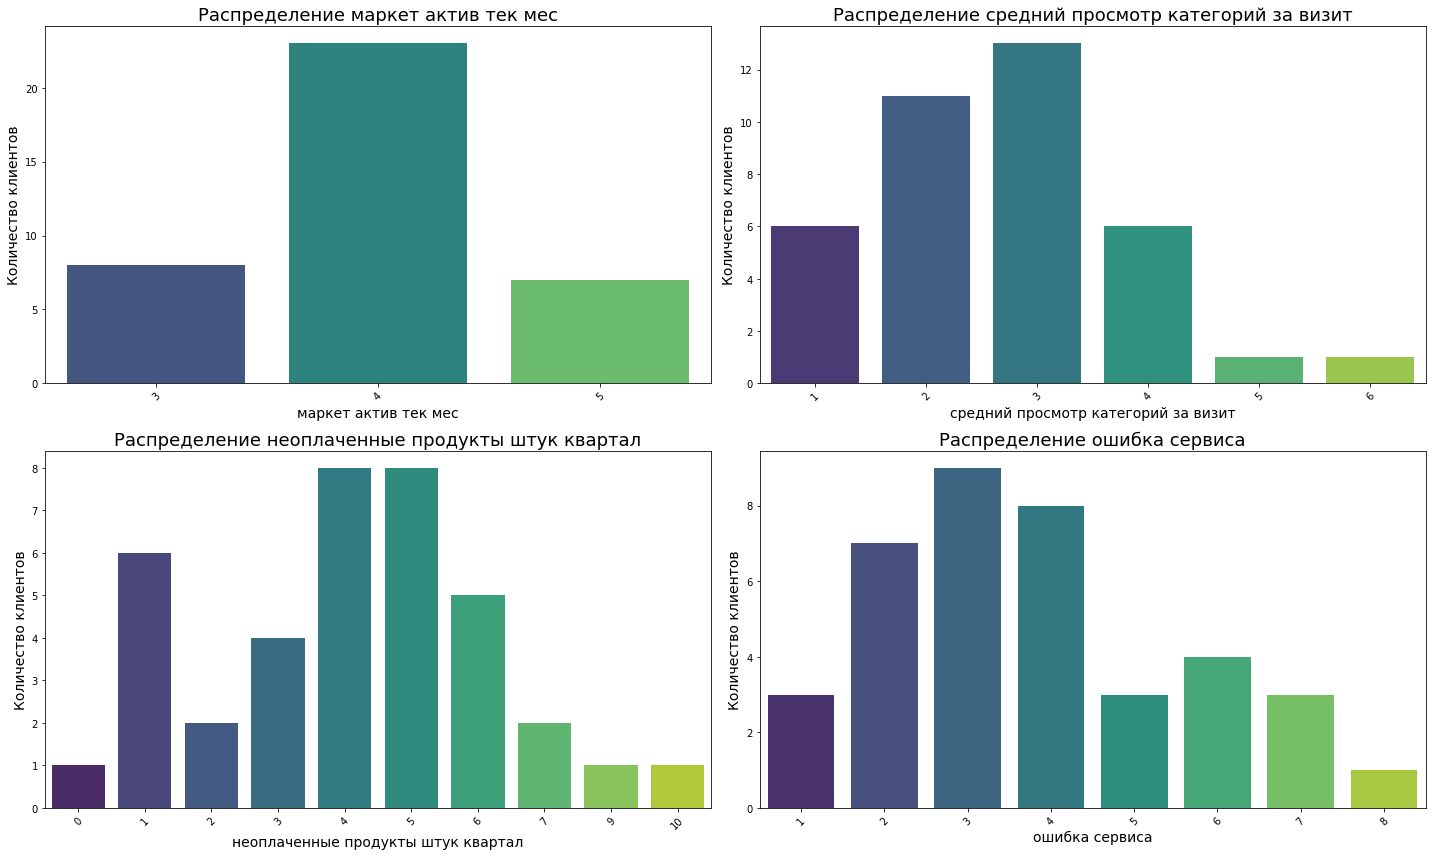

In [95]:
a = data_1
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса']
plot_discrete_features(a, b)

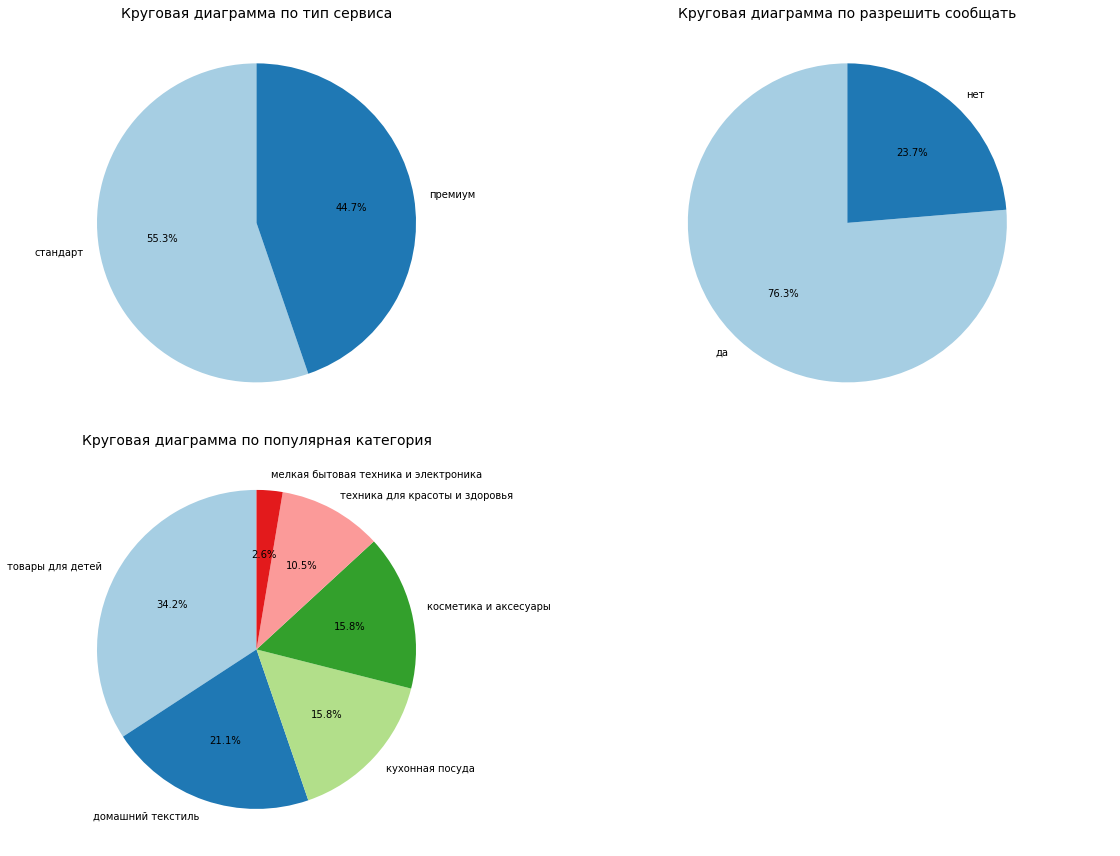

In [96]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))  # Увеличиваем размер

# Плоский массив осей для удобства
axes = axes.flatten()

# Построение круговой диаграммы для каждого категориального столбца
for ax, col in zip(axes, categorical_cols):
    data_1[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, ax=ax)
    ax.set_title(f'Круговая диаграмма по {col}', fontsize=14)
    ax.set_ylabel('')  # Убираем метку Y

# Если есть лишние подграфики, скрываем их
for ax in axes[len(categorical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

***Что можно сказать про эту категорию:***</font><br>
1) Просматривают 2-3 категории за визит, около 4 страниц и находятся на сайте около 10 минут. Оставляют неоплаченный товар около 4.</font><br>
2) Топ категория товаров: "товары для детей", "товары для дома" и "товары для себя".</font><br>
3) Товары для детей и домашний текстиль приносят суммарно больше всего выручки и прибыли. Есть смысмл направить клиентам спец.предложения именно в их любимой категории, эта кагорта покупателей явно больше выбирает такие товары. Главное, чтобы итого акция была прибыльной для компании.</font><br>

### **Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.**</font><br>


In [97]:
data_new_2 = data_new.query('`популярная категория` == "мелкая бытовая техника и электроника"')
data_new_2.head()

,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения
226,стандарт,да,2.4,4,699,0.35,мелкая бытовая техника и электроника,2,4,5,3,4778,10,7,11130.2,0.994359
46,премиум,да,3.5,5,882,0.22,мелкая бытовая техника и электроника,3,2,6,3,4557,5,6,11384.7,0.990705
145,премиум,да,5.6,5,719,0.28,мелкая бытовая техника и электроника,1,2,7,1,4475,9,5,12148.6,0.976533
228,премиум,да,4.4,4,966,0.28,мелкая бытовая техника и электроника,3,3,2,4,4657,8,9,10945.3,0.967809
281,премиум,да,4.4,4,693,0.30,мелкая бытовая техника и электроника,2,2,3,2,4446,10,13,12949.0,0.935208


In [98]:
data_new_2.describe()

,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
mean,4.362222,4.000000,640.177778,0.291556,3.377778,1.955556,4.355556,7.800000,4865.911111,14.333333,14.044444,10506.94000,0.258036
std,0.817782,0.564076,227.892448,0.240444,1.173357,1.397328,1.990381,3.237564,274.022795,3.954284,4.461734,1501.23112,0.332855
min,1.700000,3.000000,147.000000,0.110000,1.000000,0.000000,0.000000,1.000000,4346.000000,5.000000,5.000000,7251.10000,0.021020
25%,3.900000,4.000000,475.000000,0.160000,3.000000,1.000000,3.000000,6.000000,4657.000000,12.000000,11.000000,9584.30000,0.047810
50%,4.300000,4.000000,677.000000,0.220000,3.000000,2.000000,4.000000,8.000000,4882.000000,15.000000,14.000000,10883.60000,0.093587
75%,4.900000,4.000000,808.000000,0.280000,4.000000,3.000000,6.000000,10.000000,5016.000000,17.000000,18.000000,11441.20000,0.294653
max,5.800000,5.000000,1061.000000,0.990000,6.000000,5.000000,8.000000,14.000000,5408.000000,22.000000,21.000000,12949.00000,0.994359


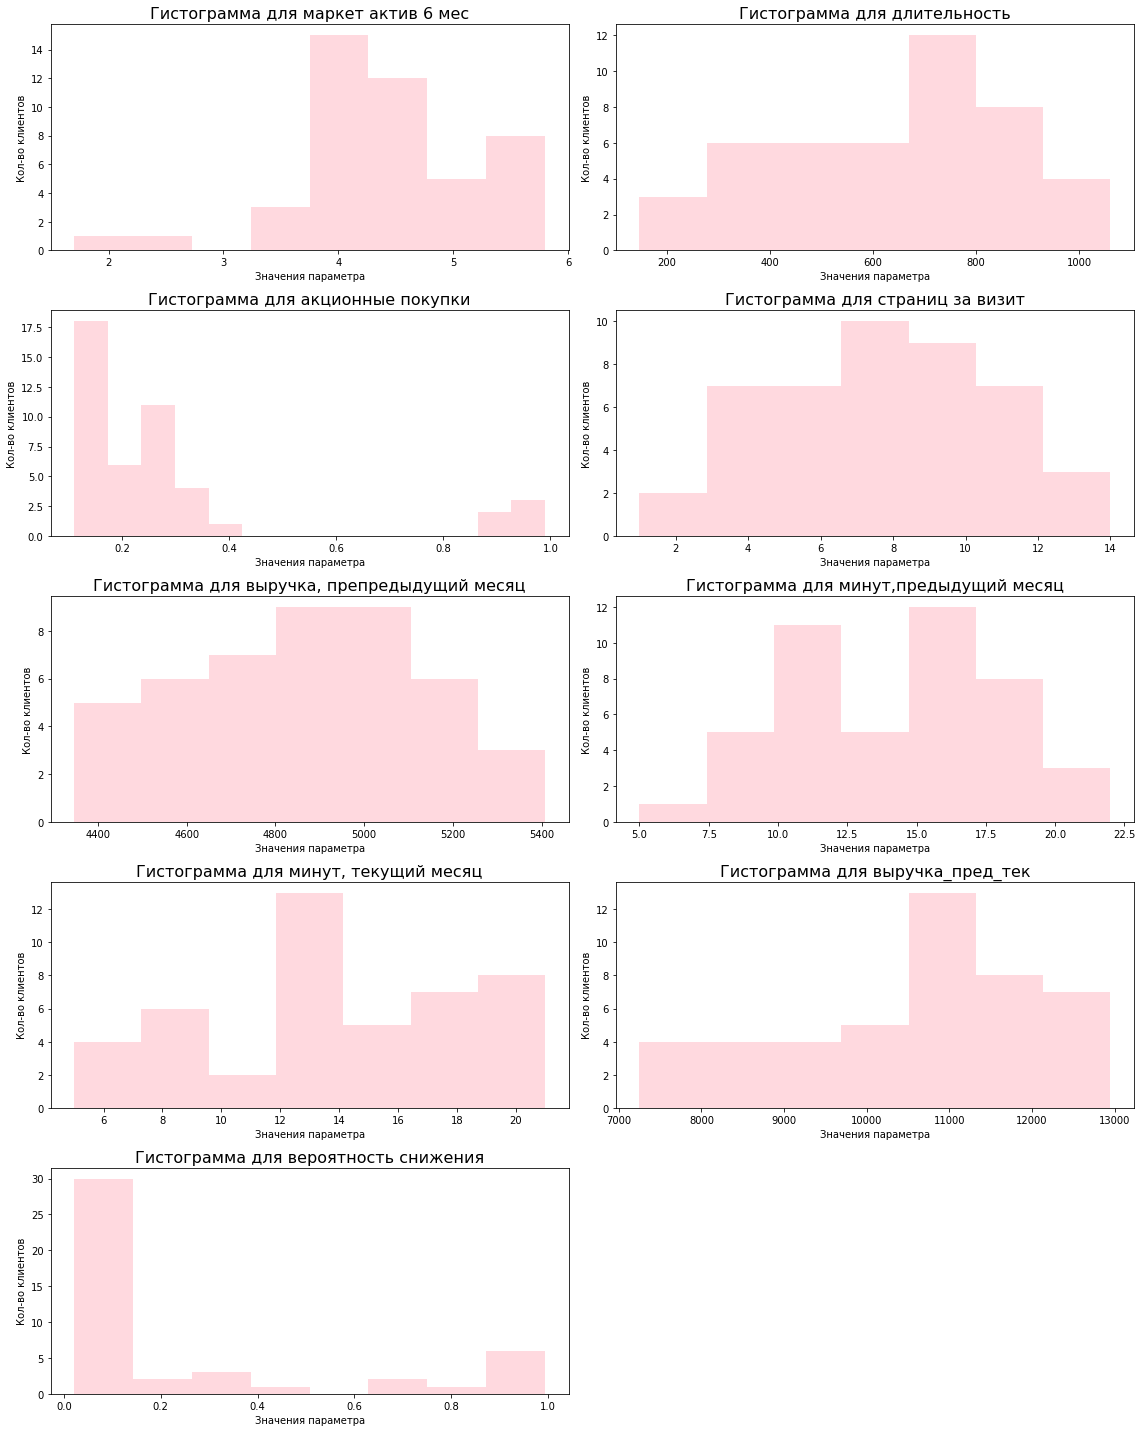

In [99]:
#вызов функции
a = data_new_2
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса'] 
plot_hist_fin(a, b)


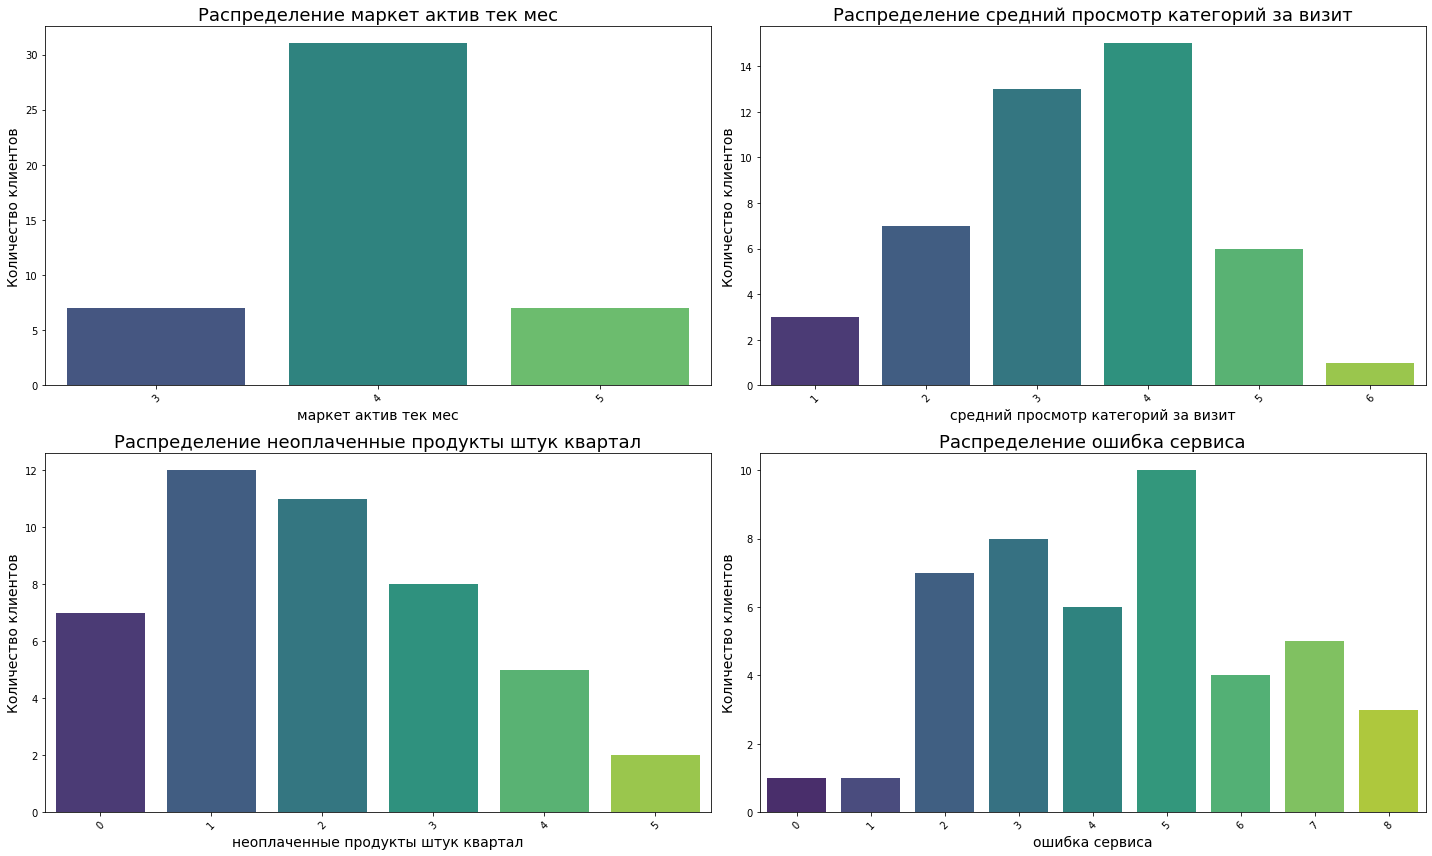

In [100]:
a = data_new_2
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса']
plot_discrete_features(a, b)

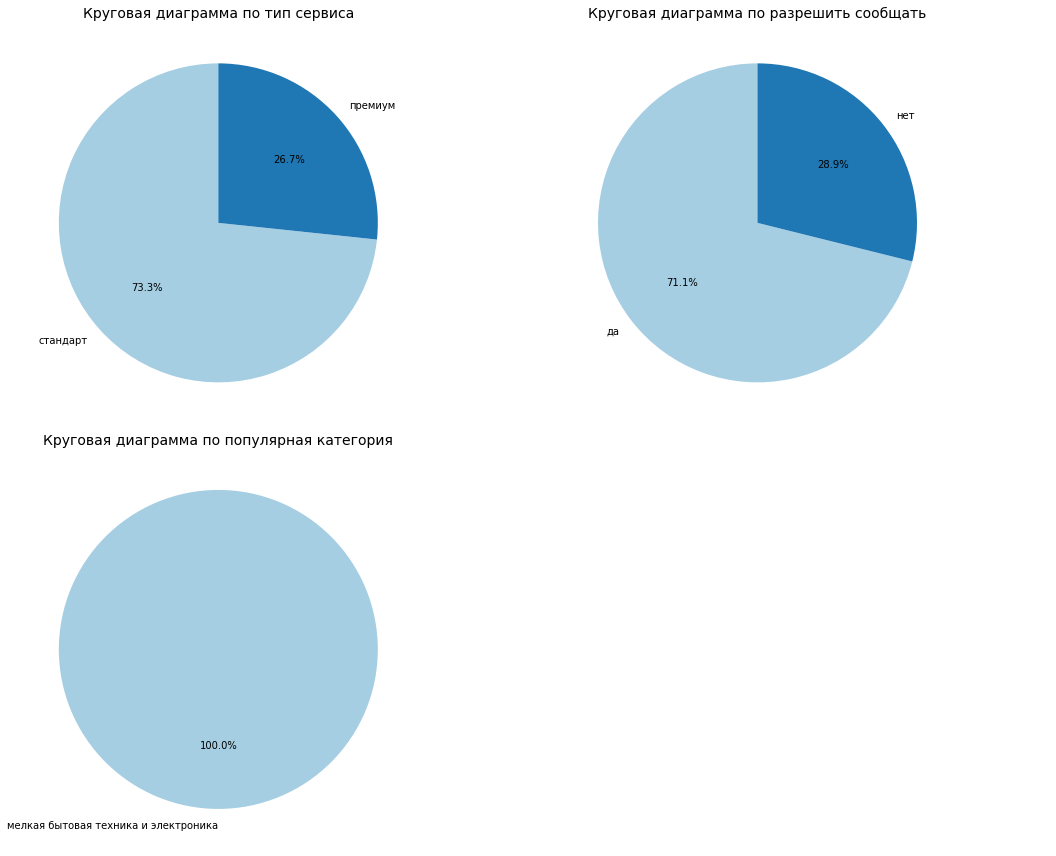

In [101]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))  # Увеличиваем размер

# Плоский массив осей для удобства
axes = axes.flatten()

# Построение круговой диаграммы для каждого категориального столбца
for ax, col in zip(axes, categorical_cols):
    data_new_2[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, ax=ax)
    ax.set_title(f'Круговая диаграмма по {col}', fontsize=14)
    ax.set_ylabel('')  # Убираем метку Y

# Если есть лишние подграфики, скрываем их
for ax in axes[len(categorical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Посмотрим более детально на тех, у кого высокая вероятность снижения.

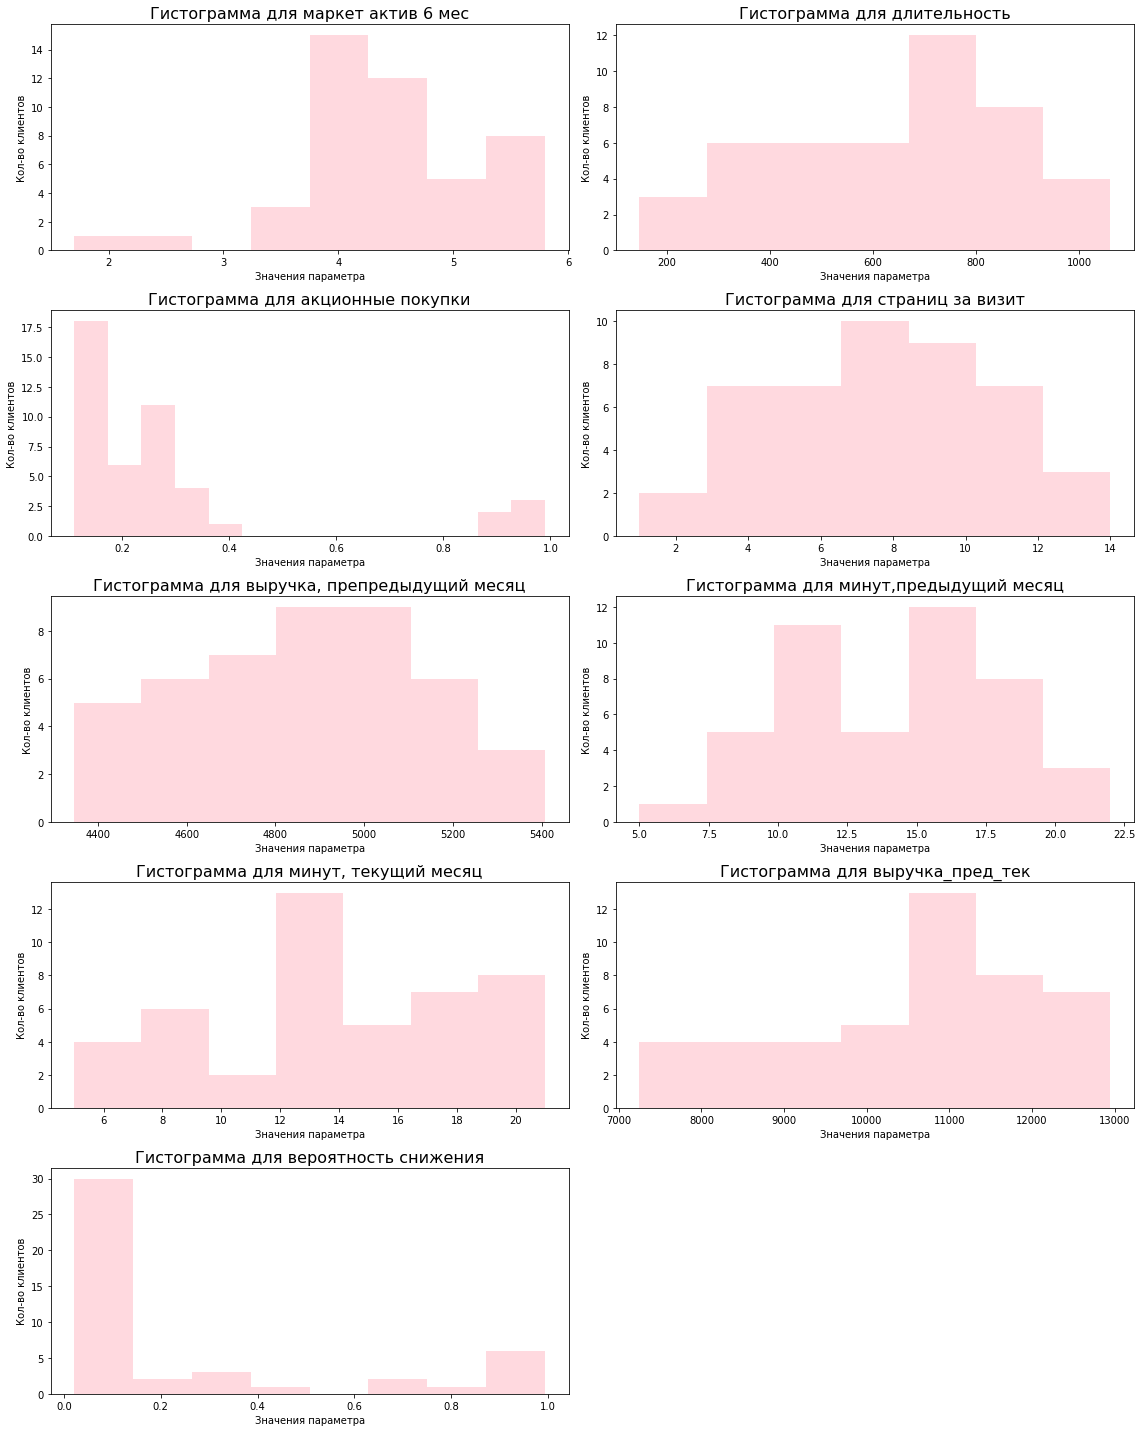

In [102]:
data_new_2 = data_new.query('`вероятность снижения` >= 0.6')
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса'] 
plot_hist_fin(a, b)


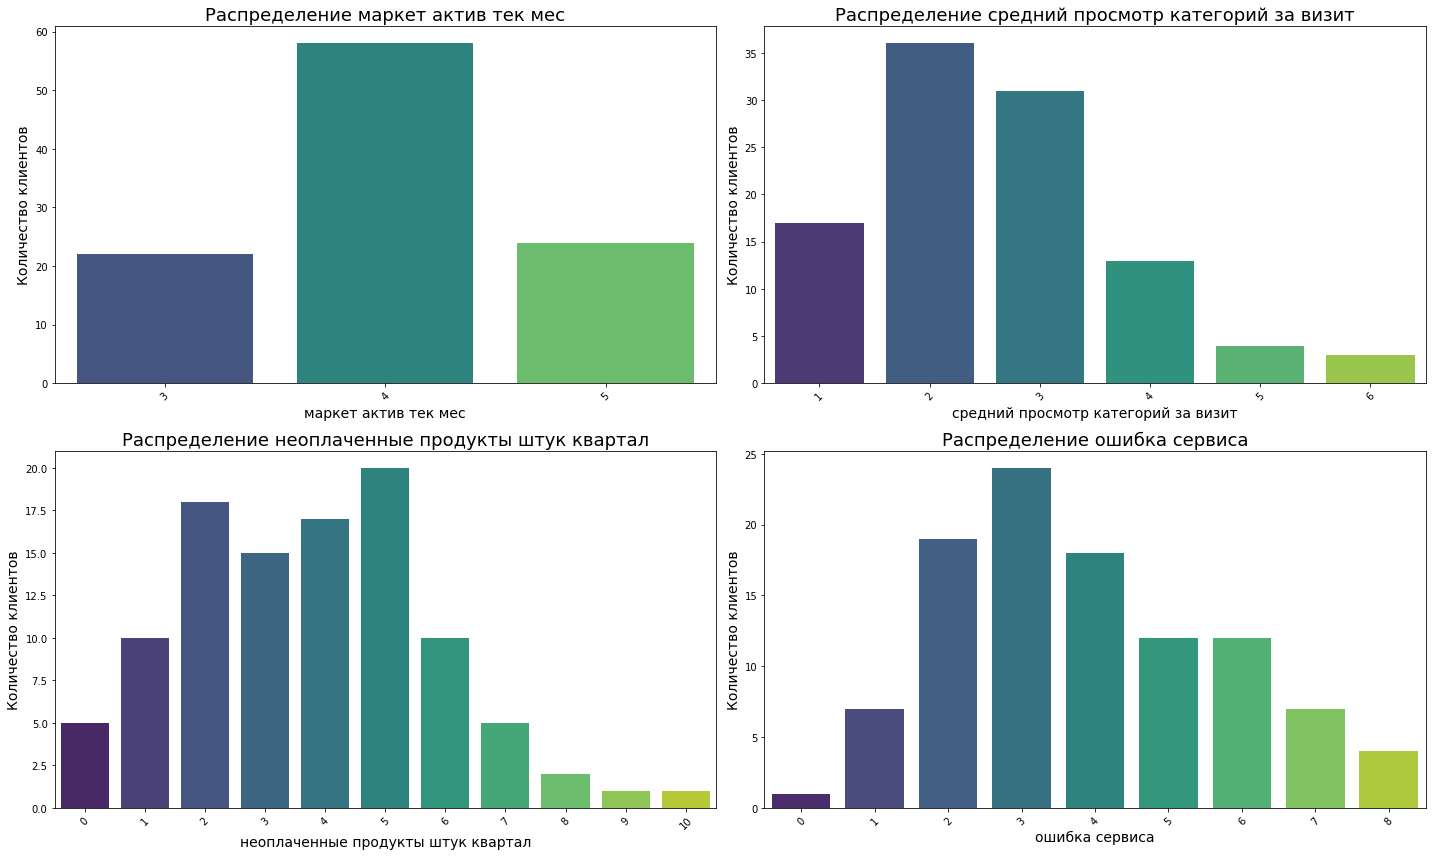

In [103]:
a = data_new_2
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса']
plot_discrete_features(a, b)

***Что можно сказать про эту категорию:***

1) У это категории мало наблюдается снижение аквтиности, возможно это связано с тем, что к технике предпринимают другой подход к покупки.</font><br>
2) Клиенты дольше находятся на сайте, больше просматривают страниц и сммотрят около 4х категорий.</font><br>
3) Доля акционных покупок небольшая, скорее всего итоговое решение о покупке принимается по другим причинам и наличие акции может быть просто доп стимулом, но не самым главным.</font><br>
4) У клиентов, у которых наблюдается снижении аквтиности меньше смотрят страниц, возможно, не могут найти нужный товар, что-то неудобно на сайте, либо сравнивают разные сайты по цене. В данном кагорте хочется больше данных для совета и может быть, есть смысл сделать рассылку по клиентам, у которых остались товары в корзине в этой категории с уточнением, что не устроило и как вариант, предложить новинки в схожей категории.

### **Группа клиентов, которые покупают товары из категории «Товары для детей».**</font><br>

In [104]:
data_new_3 = data_new.query('`популярная категория` == "товары для детей"')
data_new_3.head()

,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения
227,стандарт,нет,3.6,3,710,0.36,товары для детей,3,5,2,1,4393,6,11,11719.4,0.997217
24,премиум,да,3.0,4,558,0.89,товары для детей,3,3,7,4,4715,8,9,10886.6,0.995351
276,стандарт,да,4.0,4,618,0.93,товары для детей,3,5,2,2,4566,9,10,7631.0,0.994496
311,стандарт,да,2.6,4,302,0.28,товары для детей,1,2,5,4,4291,5,6,10786.4,0.994209
60,премиум,да,2.9,3,506,0.90,товары для детей,1,5,3,4,4607,10,9,10793.6,0.993732


In [105]:
data_new_3.describe()

,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,4.069231,3.987179,574.743590,0.356154,3.474359,2.910256,3.961538,8.217949,4816.615385,12.897436,12.076923,9787.108974,0.424750
std,1.104455,0.693075,247.244946,0.283912,1.326301,1.866909,1.903123,4.479817,323.140082,4.222973,4.359701,1422.790274,0.407482
min,1.400000,3.000000,131.000000,0.110000,1.000000,0.000000,0.000000,1.000000,4138.000000,5.000000,4.000000,6038.300000,0.025249
25%,3.500000,4.000000,377.250000,0.172500,2.250000,1.000000,2.000000,4.000000,4631.500000,10.000000,9.250000,8711.325000,0.078152
50%,4.100000,4.000000,582.000000,0.240000,3.500000,3.000000,4.000000,7.500000,4764.500000,12.500000,12.000000,9870.450000,0.160167
75%,4.875000,4.000000,761.500000,0.310000,4.000000,4.000000,5.000000,11.750000,4971.250000,16.750000,14.000000,10692.575000,0.948971
max,6.100000,5.000000,1042.000000,0.990000,6.000000,9.000000,8.000000,20.000000,5624.000000,20.000000,23.000000,12913.600000,0.997217


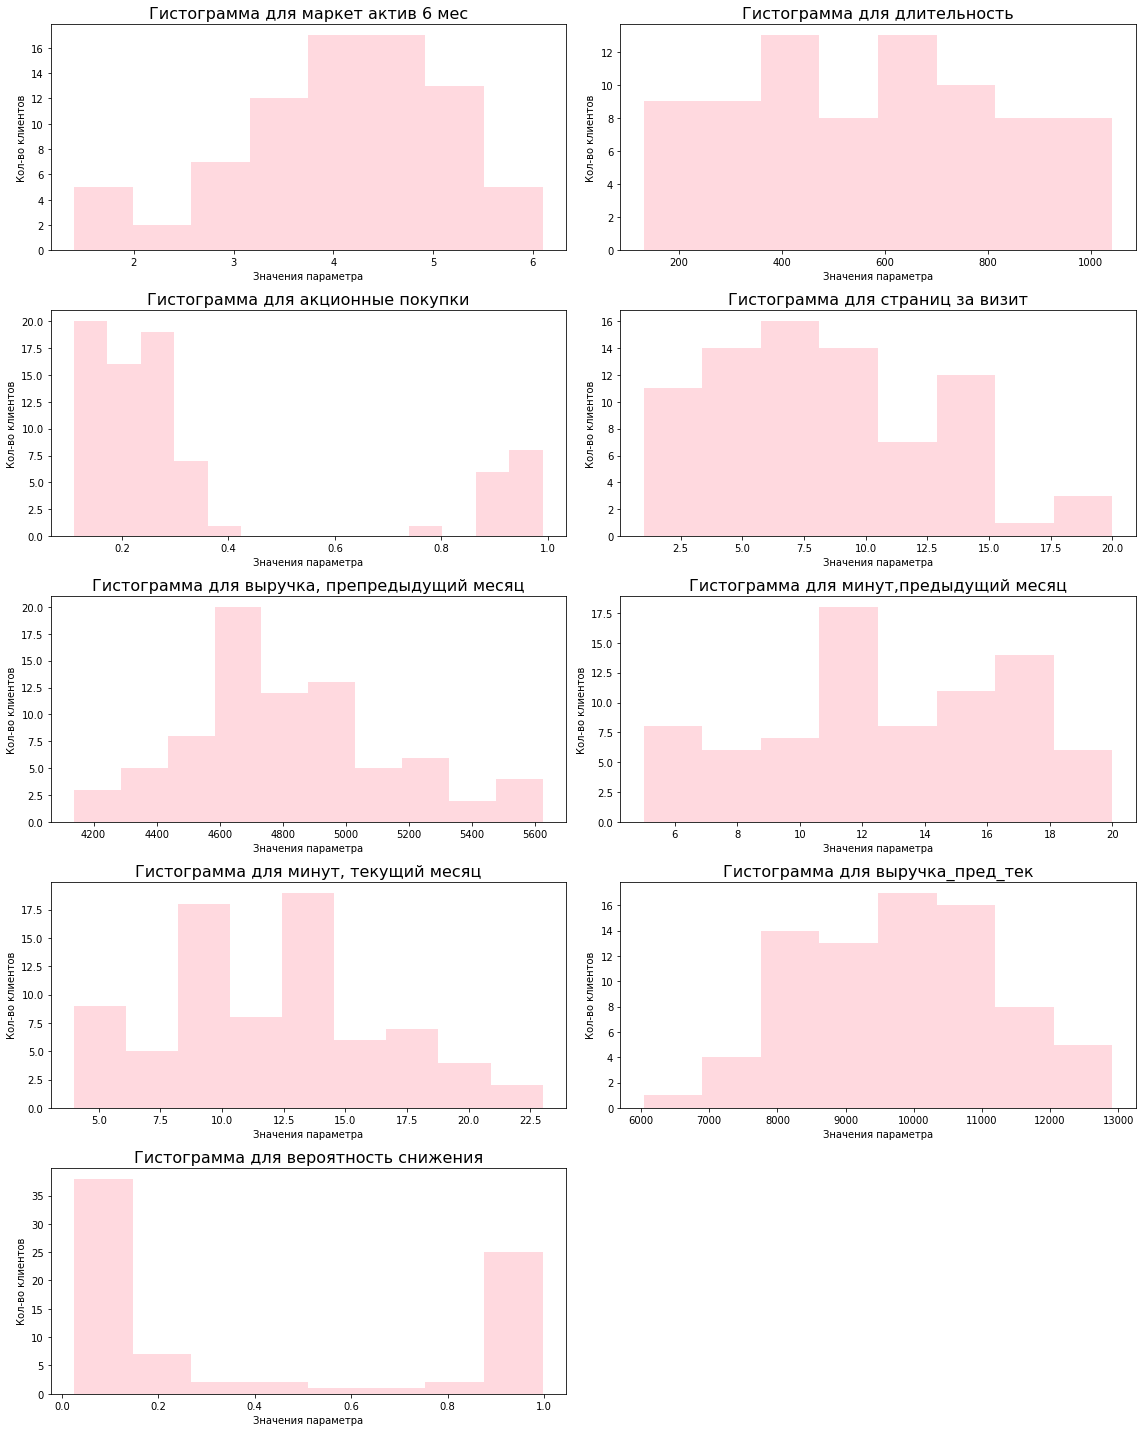

In [106]:
a = data_new_3
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса'] 
plot_hist_fin(a, b)


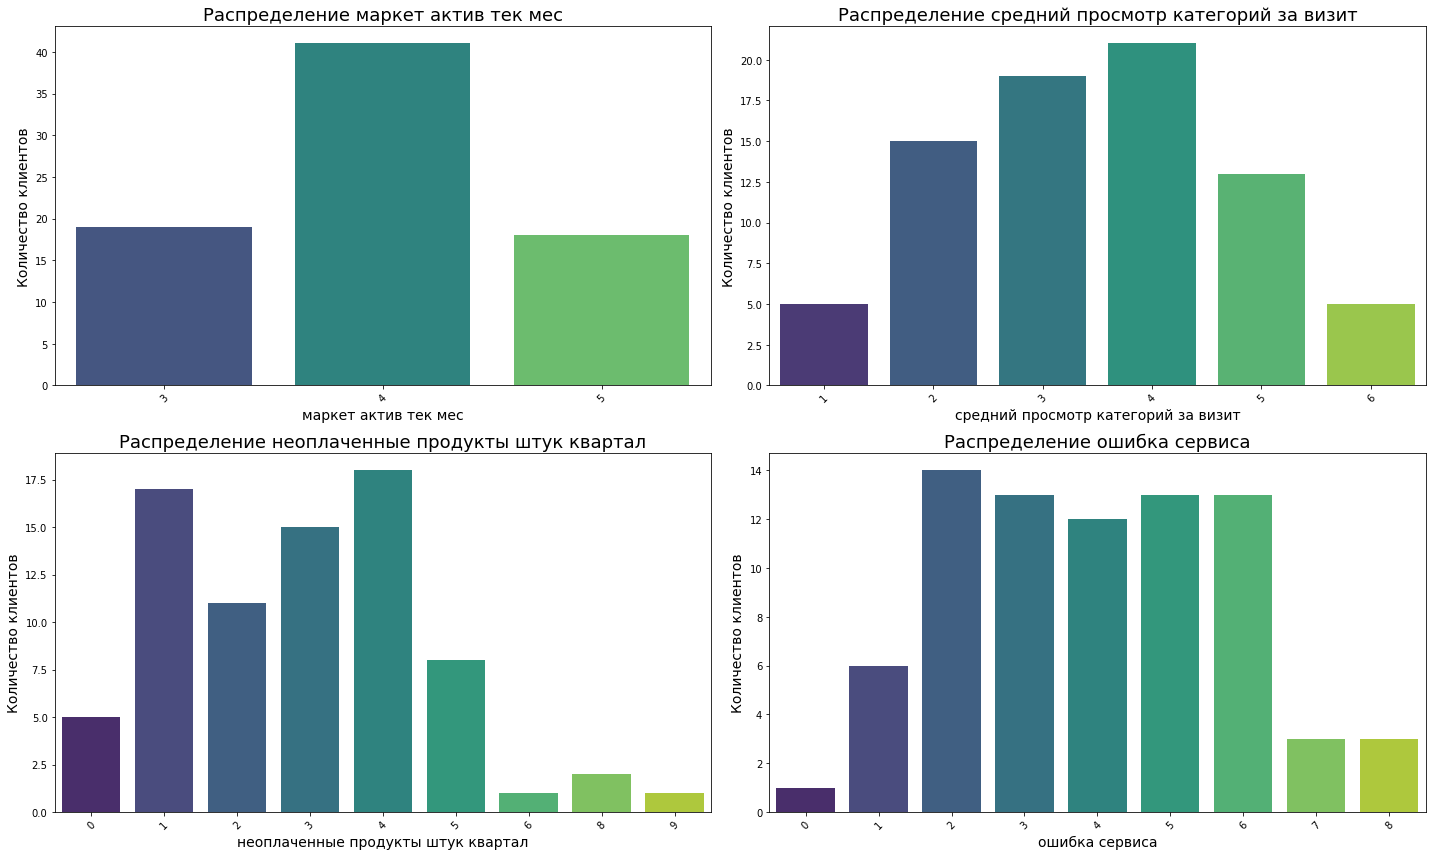

In [107]:
a = data_new_3
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса']
plot_discrete_features(a, b)

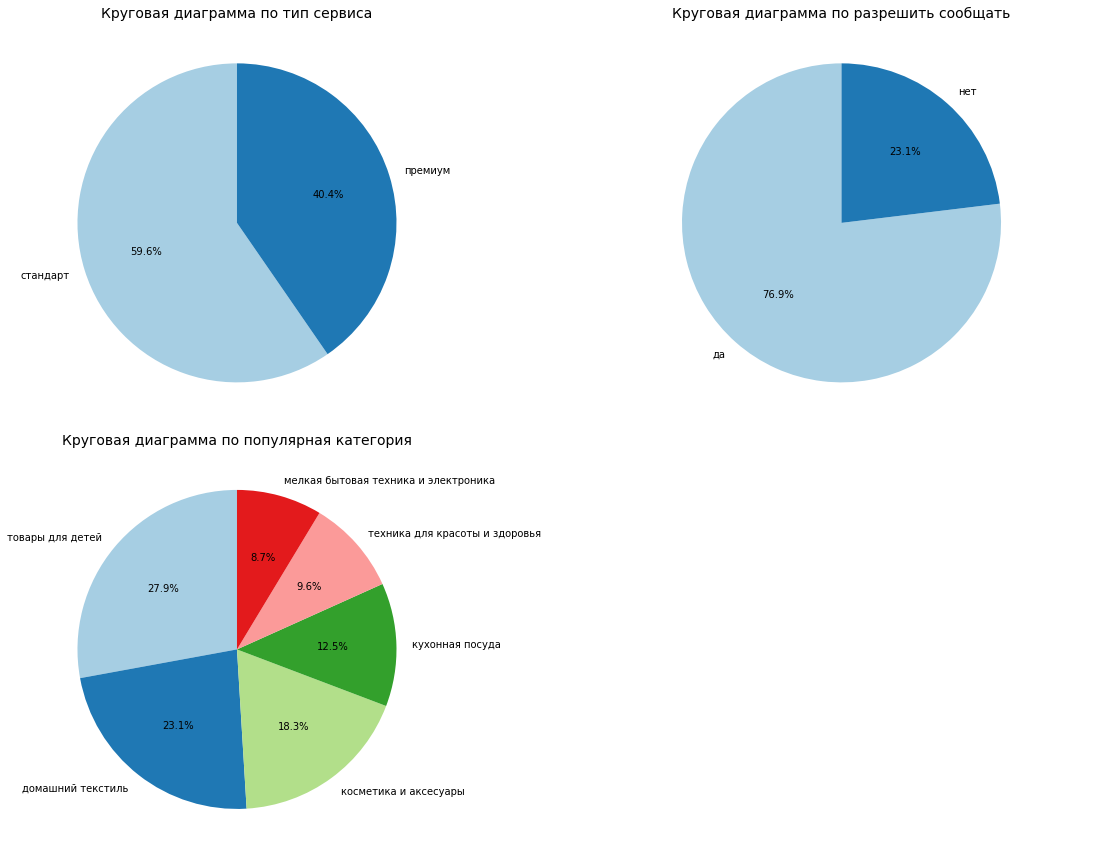

In [108]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))  # Увеличиваем размер

# Плоский массив осей для удобства
axes = axes.flatten()

# Построение круговой диаграммы для каждого категориального столбца
for ax, col in zip(axes, categorical_cols):
    data_new_2[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, ax=ax)
    ax.set_title(f'Круговая диаграмма по {col}', fontsize=14)
    ax.set_ylabel('')  # Убираем метку Y

# Если есть лишние подграфики, скрываем их
for ax in axes[len(categorical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Посмотрим более детально на ту группу, у который высокий риск снижения активности.

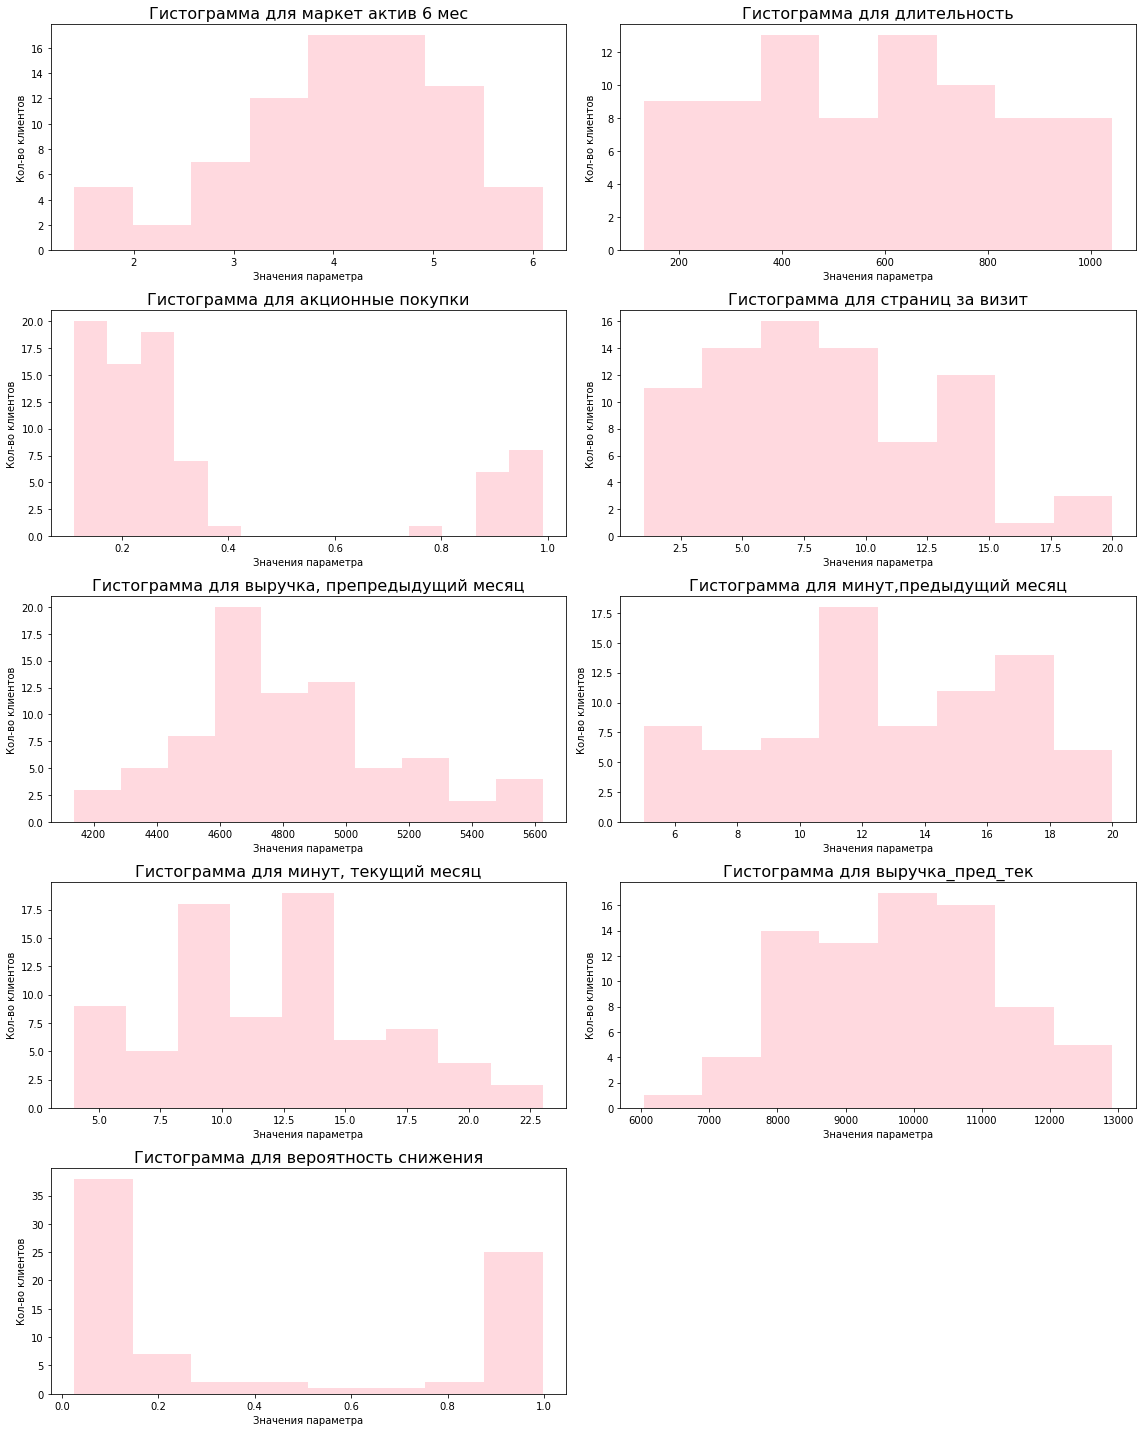

In [109]:
data_new_3 = data_new.query('`вероятность снижения` >= 0.8')
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса'] 
plot_hist_fin(a, b)

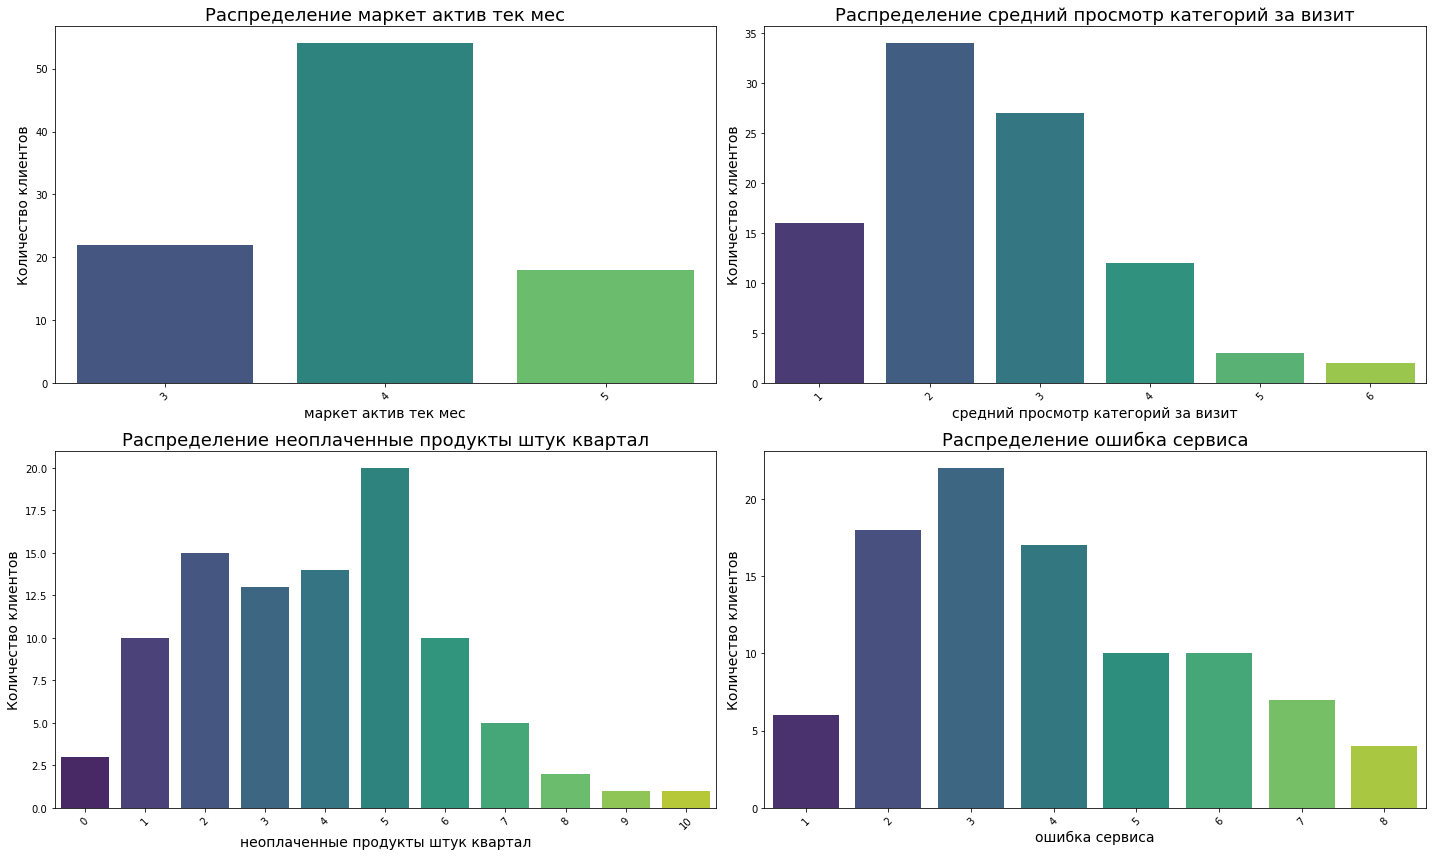

In [110]:
a = data_new_3
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса']
plot_discrete_features(a, b)

***Что можно сказать про эту категорию:***

1) Доля акционных покупок в среднем около 30%</font><br>
2) Клиенты просматривают немного страниц (до 5) и время нахождения на сайте в текущем месяце становится меньше. Больше неоплаченных товаров остается. </font><br>
3) У клиентов, у которых наблюдается снижении аквтиности меньше смотрят страниц и доля акционных покупок варьируется от 30% до 100%. Возможно, что для этой категории важно видеть акции и покупать именно по ним. 

### **Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.**</font><br>

Выведем самые популчрные товары по выручке.

In [111]:
data_new['выручка 3'] = data_new['выручка_пред_тек'] + data_new['выручка, препредыдущий месяц']

In [112]:
data_new.describe()

,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения,выручка 3
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,4.216049,3.962963,590.969136,0.327099,3.330247,2.734568,4.157407,8.145062,4826.731481,13.243827,13.030864,10158.986420,0.388157,14985.717901
std,1.048302,0.662006,243.995011,0.254989,1.380608,1.810849,1.986777,4.057704,315.802313,3.946130,4.373326,1466.772942,0.387525,1566.484197
min,0.900000,3.000000,129.000000,0.110000,1.000000,0.000000,0.000000,1.000000,4138.000000,5.000000,4.000000,6038.300000,0.017306,10575.900000
25%,3.800000,4.000000,407.000000,0.170000,2.000000,1.000000,3.000000,5.000000,4595.000000,10.000000,10.000000,9210.150000,0.068104,13951.275000
50%,4.200000,4.000000,594.500000,0.240000,3.000000,3.000000,4.000000,8.000000,4794.500000,13.000000,13.000000,10218.500000,0.154823,15151.600000
75%,4.900000,4.000000,786.000000,0.310000,4.000000,4.000000,6.000000,11.000000,5024.250000,16.000000,16.000000,11232.175000,0.900893,16107.300000
max,6.600000,5.000000,1061.000000,0.990000,6.000000,10.000000,9.000000,20.000000,5624.000000,22.000000,23.000000,13870.800000,0.999992,18838.800000


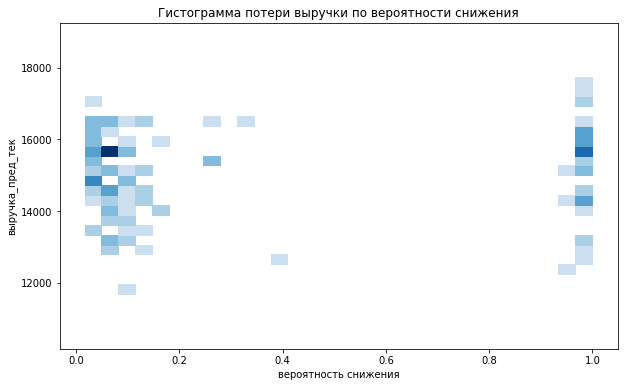

In [113]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data_new, x='вероятность снижения', y='выручка 3', bins=30, pthresh=0.05, cmap="Blues", fill=True)
plt.title('Гистограмма потери выручки по вероятности снижения')
plt.xlabel('вероятность снижения')
plt.ylabel('выручка_пред_тек')
plt.show() 

Сложны выделить деление конкретно по размеру выручки, отсеем клиентов, у которых вероятность снижения более 50% и выручка выше медианы по общим данным более 15000.

In [114]:
data_new_4 = data_new.query('`вероятность снижения` >= 0.5 and `выручка 3` >= 15000')
data_new_4.head()

,тип сервиса,разрешить сообщать,маркет актив 6 мес,маркет актив тек мес,длительность,акционные покупки,популярная категория,средний просмотр категорий за визит,неоплаченные продукты штук квартал,ошибка сервиса,страниц за визит,"выручка, препредыдущий месяц","минут,предыдущий месяц","минут, текущий месяц",выручка_пред_тек,вероятность снижения,выручка 3
91,премиум,да,3.1,4,893,0.24,кухонная посуда,2,4,3,2,4691,5,8,12670.1,0.999992,17361.1
108,стандарт,да,3.5,3,720,0.30,домашний текстиль,2,6,4,2,4729,10,11,11927.9,0.997423,16656.9
227,стандарт,нет,3.6,3,710,0.36,товары для детей,3,5,2,1,4393,6,11,11719.4,0.997217,16112.4
24,премиум,да,3.0,4,558,0.89,товары для детей,3,3,7,4,4715,8,9,10886.6,0.995351,15601.6
232,стандарт,нет,3.4,4,731,0.34,косметика и аксесуары,3,2,6,2,4470,6,11,11677.9,0.994668,16147.9


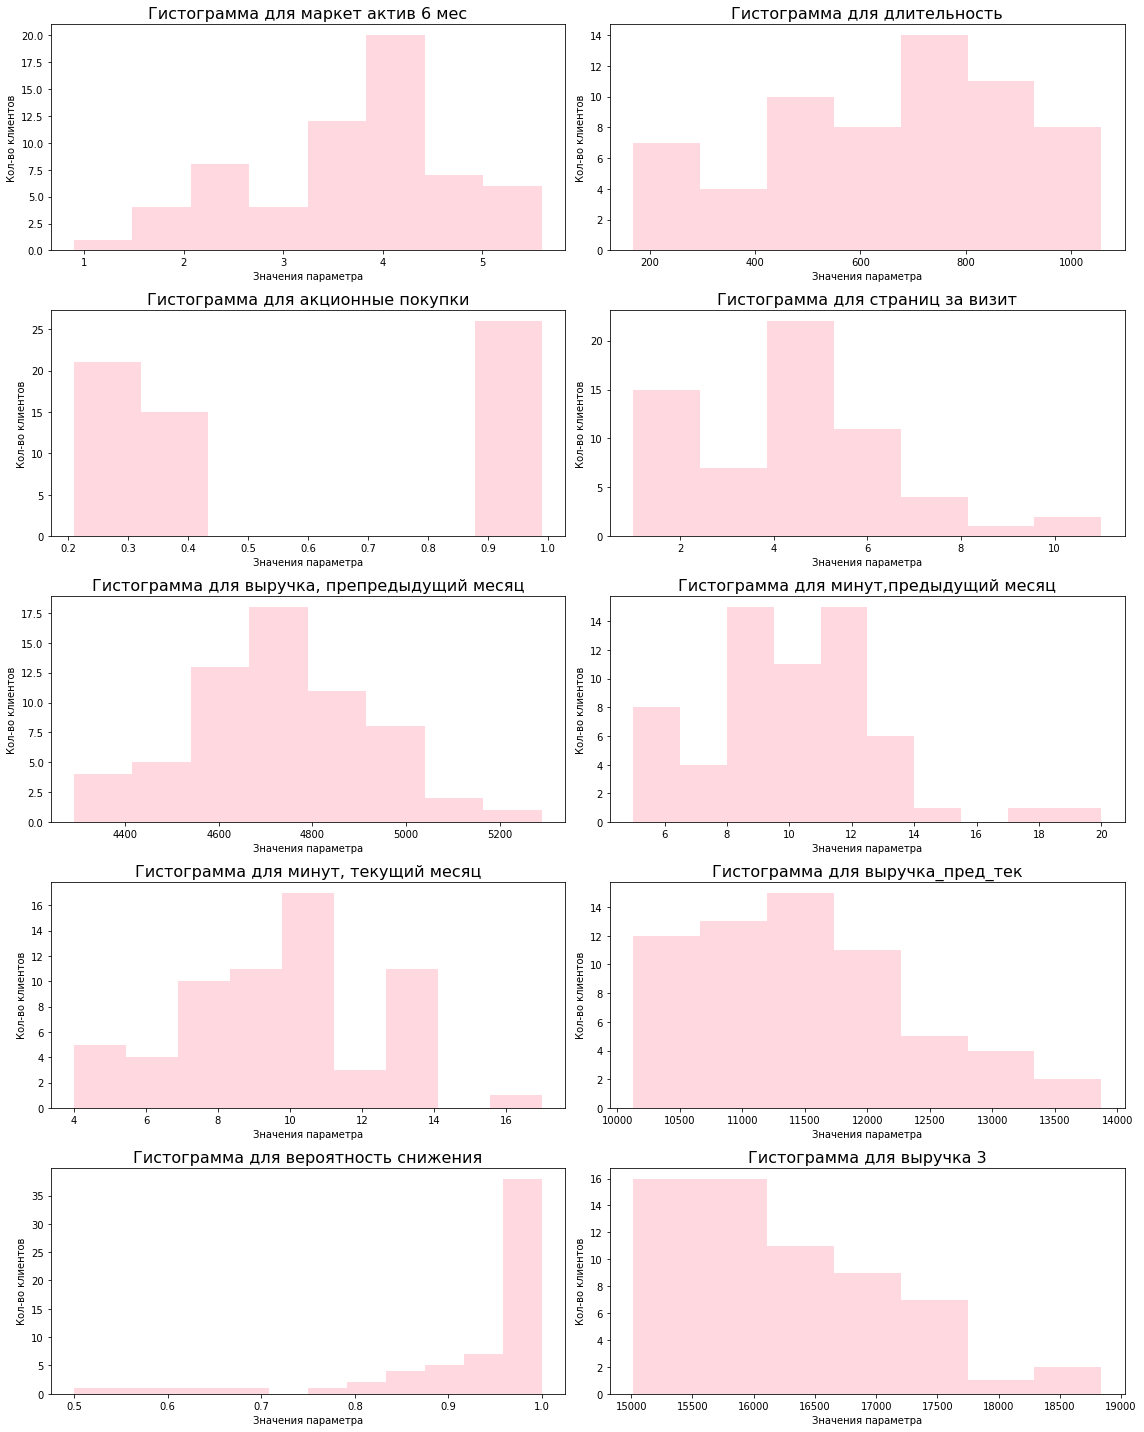

In [115]:
a = data_new_4
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса'] 
plot_hist_fin(a, b)

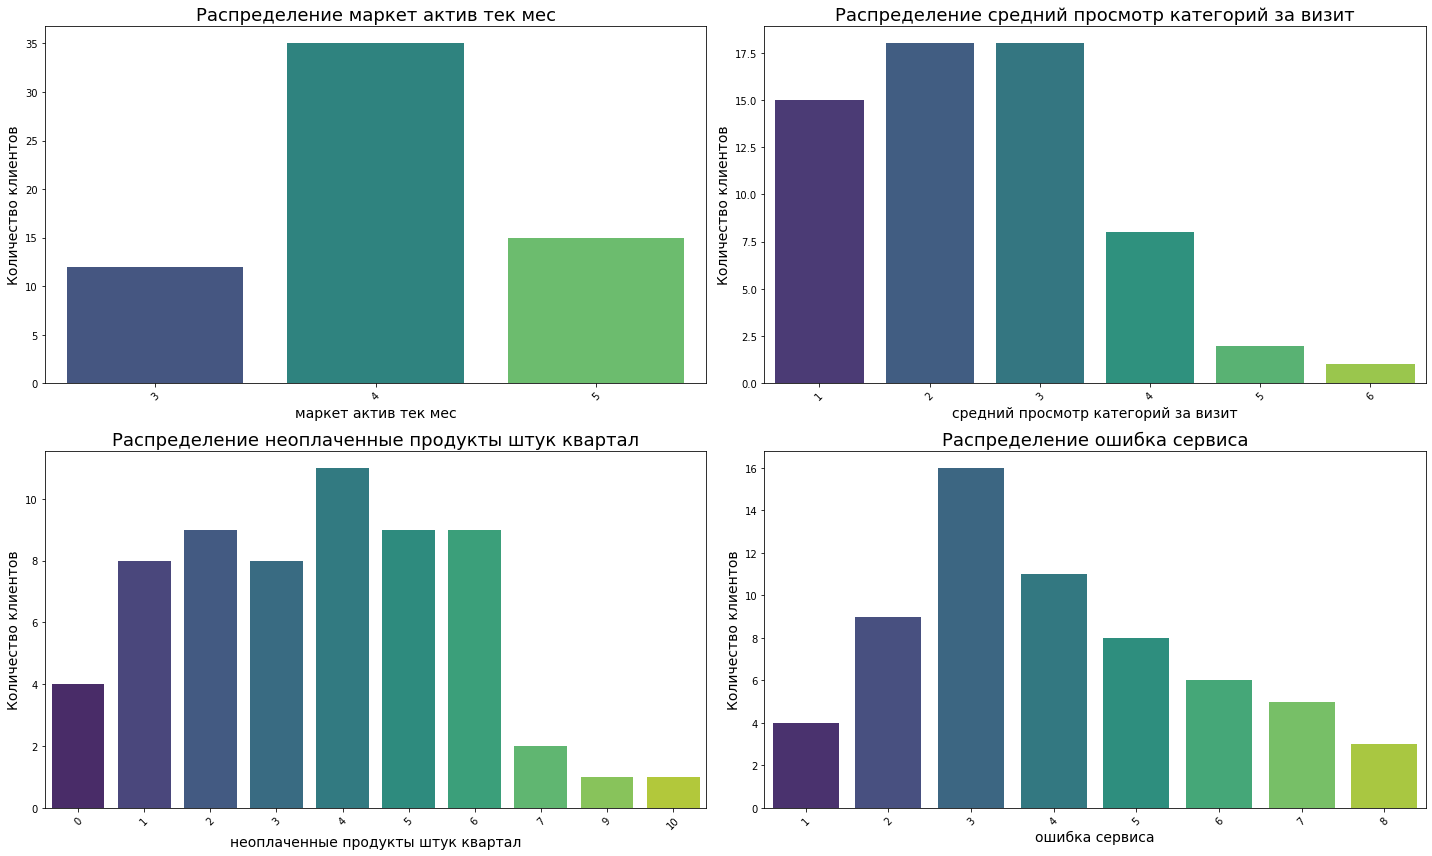

In [116]:
a = data_new_4
b = ['маркет актив тек мес', 'средний просмотр категорий за визит', 
     'неоплаченные продукты штук квартал', 'ошибка сервиса']
plot_discrete_features(a, b)

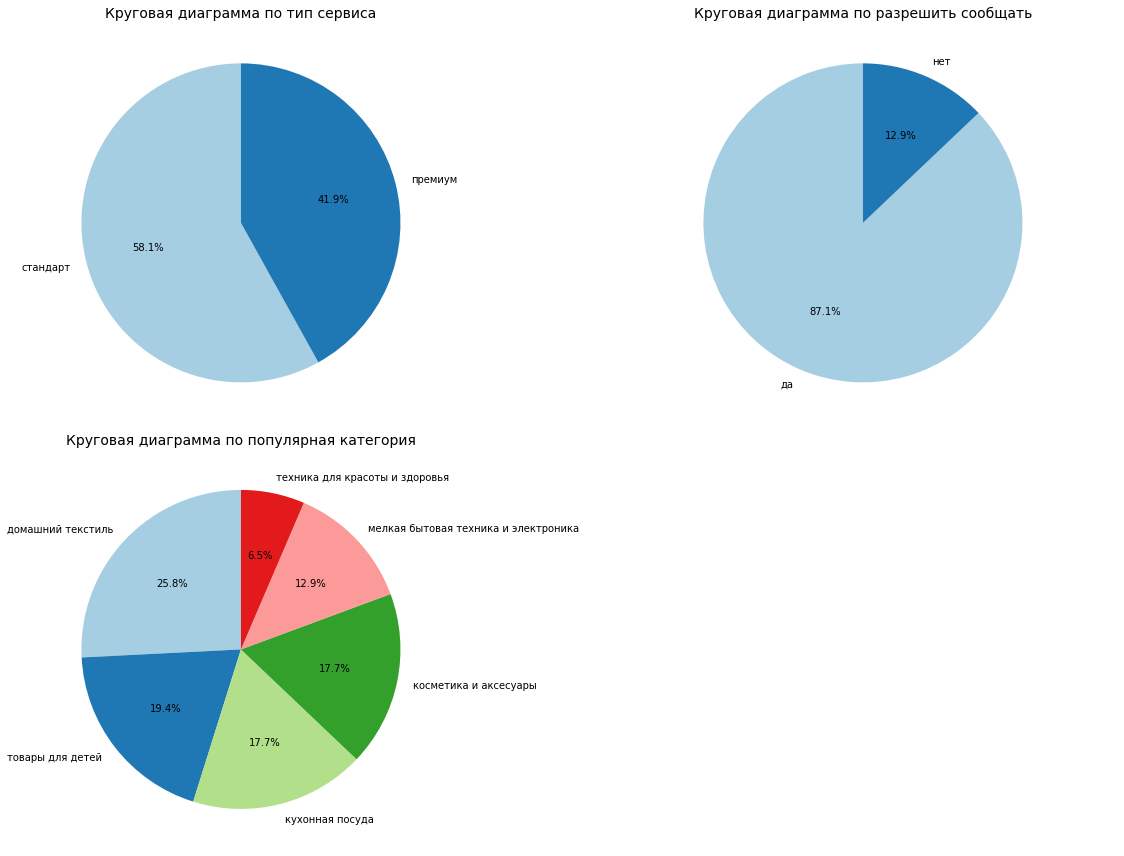

In [117]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))  # Увеличиваем размер

# Плоский массив осей для удобства
axes = axes.flatten()

# Построение круговой диаграммы для каждого категориального столбца
for ax, col in zip(axes, categorical_cols):
    data_new_4[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, ax=ax)
    ax.set_title(f'Круговая диаграмма по {col}', fontsize=14)
    ax.set_ylabel('')  # Убираем метку Y

# Если есть лишние подграфики, скрываем их
for ax in axes[len(categorical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

***Что можно сказать про эту категорию:***

1) Доля акционных покупок по пикам 30% или все 100%. </font><br>
2) Клиенты просматривают немного страниц (до 5),2-3 категории. </font><br>
3) Топ категории: косметика, товары для детей, домашний текстить и кухонная посуда. </font><br>
4) Если смотреть по маркет.активности и время просмотра страниц - видна небольшая зависимость. </font><br>
Раз есть пики доле акционных товаров до 100%, то данные клиенты любят акционные предложения и можно расшевелить клиентов, у которых тенденция к снижению более интересным предложением в их топ категории. 

**Что можно сказать итого про категориям**
1) Клиенты ведут себя по-разному в некоторых категориях товара. </font><br>
2) Где-то можно привлечь акционным товаром или интересным предложением, а где-то нужно искать другие варианты заинтересованности. </font><br>
3) Нужно следить за самыми прибыльными товарами и клиентам, которые интересны эти товары поддерживать интерес.</font><br>
4) Есть категории, которые сильно просели в выручке в целом: бытовая техника и товары для красоты. Возможно, у конкурентов более интересные предожения, надо более глубоко погрузиться в лценку ассортимента данной категории.</font><br>

## Итоговые выводы


По работе была поставлена задача сделать ***персонализированные предложения для клиентов*** и выделить разные категории клиентов.

Были предоставлены несколько файлов с данными, для анализа:
- данные  о поведении клиентов на сайте
- данные о выручке
- данные о проведенном времени на сайте у клиентов
- данные о среднемесячной прибыли 

***Были проделаны следующие задачи:*** </font><br>
1. Анализ данных и предобработка данных.
- в данных о поведении клиентов на сайте в типе сервиса была найдена опечтка, скорее всего из-за того, что они заполнялись вручную

2. Исследовательский анализ данных.
По общим данным было видно: </font><br>
- почти 62% клиентов сохранило свой уровень активности, а у 38% она снизилась.</font><br>
- почти 71% клиентов относятся к типу стандарт, а у 29% к премиум.</font><br>
- почти 74% клиентов лояльно относятся к рассылкам, а у 26% стоит запрет.</font><br>
- за 6 месяцев в среднем происходит 4 разных маркет.коммуникаций с покупателем. </font><br>
- весомая доля клиентов от 500 до 800 дней, то есть большая часть уже старых и активных покупателей компании.</font><br>
- чаще всего клиенты рассматривает от 2 до 4 категорий за раз и до 10 страниц.  
- у многих клиентов по 1-2 товару застревает в корзине. </font><br>
- По немногу сбоев, но происходит со многими клиентами. </font><br>
- клиент проводит на сайте около 13 минут.
- выручка в текущем и предудыщем месяце около 5000, а до этого была чуть ниже. 
- были новые клиенты, которые еще не осуществили выручки (убрали их из выборки, чтобы не влияли на итоговые параметры)

***Объединили 3 таблицы в одну и проанализировали совместно в разрезе покупательской активности: Снизилась/прежний.***</font><br>

Объединенные данные в сравнении снизилась/прежний уровень активности.</font><br>
- Видно, что маркет аквтиность у клиентов, у которых снизилась активность, ниже, чем у тех, кто на прежнем уровне.
- Снизилась активность больше у старых покупателей.
- Доля акционных покупок у тех, у кого снизилась марет актиновсть выше и достигает 2х пиков. Около 30% и 100%.
- Меньше смотрят категорий за визит, в среднем 2 (снизилась). 
- Больше и чаще встречаются неоплаченные продукты  4 / 1(снизилась).
- Ошибок сервиса больше у клиентов на прежнем уровне. 4 / 3.
- Меньше смотрят страниц - 5, у прежних - 7,5.
- Выручка текущий и предыдущие месяц юлизкие около 5000, а предпредыдущий у тех, у кого снизилась активность ниже около 4700.
- Меньше предыдущиий находятся на сайте 10 / 14, текущий еще больше снизился 9 к 13.

В категориальных данных:
- Доля примиум выше у клиентов со снижением.
- Снизилась доля категории Мелкая бытовая техника  и техника для красоты и здоровья.


3. Провели корреляционный анализ.
Выявили высокую связь выручки за текущий месяц и выручка за предыдущий месяц - 0,88, сделали объединение данных.

4. Провели поиск лучшей модели для определения снижения активности покупательской способности и выбирали ту, у которой лучший результат.

Лучшая модель: {'models': SVC(probability=True, random_state=42), 'preprocessor__num': StandardScaler()} (метод опорных векторов)</font><br>
Оценка качества на тестовых данных: roc_auc = 0.91</font><br>

5. Определили самые важные признаки, которые влияют на оценку модели. 

- длительность,сколько дней прошло с момента регистрации покупателя на сайте
- минут, которые клиент провел на сайте в предыдущем и текущем месяце
- средний просмотр категорий за визит
- сколько страниц за визит было просмотрено
- выручка за предыдущие 3 месяца
- ошибка сервиса
- неоплаченные продукты 
- маркет актив 6 мес и тек месяц
- тип сервиса: стандрат
- акционные покупки


6. Провели категоризацию клиентов.

**Что можно сказать итого про категориям**
1) Поведение клиентов зависит от выбранной категории. Например, в категории товаров клиенты чаще покупают товары по акции, а вот в категории бытовая техника работают другие принципы. </font><br>
2) Где-то можно привлечь акционным товаром или интересным предложением, а где-то нужно искать другие варианты заинтересованности. </font><br>
3) Нужно следить за самыми прибыльными товарами и клиентам, которые интересны эти товары поддерживать интерес.</font><br>
4) Есть категории, которые сильно просели в выручке в целом: бытовая техника и товары для красоты. Возможно, у конкурентов более интересные предожения, надо более глубоко погрузиться в оценку ассортимента данной категории.</font><br>



На основании данных можно выстроить интересные персональные предложения в топ категориях, было бы здорово получить еще больше данных в рамках конкретных товаров, ведь может такое быть, что 50%, а то и больше уходит в продажи одного товара и потеря/подорожание конкретного товара сильно повлияет на общую тенденцию категории и поведение клиента.
Так же для категоризац